In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')

cust_df = pd.read_csv('train_santander.csv', encoding = 'latin-1')
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()
proportion = unsatisfied_cnt / total_cnt
print('proportion :{0: .2f}'.format(proportion))

0    73012
1     3008
Name: TARGET, dtype: int64
proportion : 0.04


In [39]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [3]:
cust_df.replace(-999999, 2, inplace = True)
cust_df.drop(labels = 'ID', axis = 1, inplace = True)

X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('shape : {0}'.format(X_features.shape))

shape : (76020, 369)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = 0.2, random_state = 0)
train_cnt = y_train.count()
test_cnt = y_test.count()

print('학습 세트 shape : {0}, 테스트 세트 shape : {1}\n'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts() / train_cnt)
print('\n테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts() / test_cnt)

학습 세트 shape : (60816, 369), 테스트 세트 shape : (15204, 369)

학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [5]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)
xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = 0.05, random_state = 156)

xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 100, eval_metric = 'auc',
            eval_set = [(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0: .4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.83092	validation_1-auc:0.80941
[2]	validation_0-auc:0.83207	validation_1-auc:0.80903
[3]	validation_0-auc:0.83288	validation_1-auc:0.80889
[4]	validation_0-auc:0.83414	validation_1-auc:0.80924
[5]	validation_0-auc:0.83524	validation_1-auc:0.80907
[6]	validation_0-auc:0.83568	validation_1-auc:0.81005
[7]	validation_0-auc:0.83741	validation_1-auc:0.81088
[8]	validation_0-auc:0.83896	validation_1-auc:0.81305
[9]	validation_0-auc:0.83949	validation_1-auc:0.81363
[10]	validation_0-auc:0.83908	validation_1-auc:0.81277
[11]	validation_0-auc:0.83913	validation_1-auc:0.81260
[12]	validation_0-auc:0.84009	validation_1-auc:0.81325
[13]	validation_0-auc:0.84081	validation_1-auc:0.81329
[14]	validation_0-auc:0.84196	validation_1-auc:0.81380
[15]	validation_0-auc:0.84394	validation_1-auc:0.81540
[16]	validation_0-auc:0.84414	validation_1-auc:0.81573
[17]	validation_0-auc:0.84437	validation_1-auc:0.81577
[18]	validation_0-au

[149]	validation_0-auc:0.90451	validation_1-auc:0.83346
[150]	validation_0-auc:0.90459	validation_1-auc:0.83343
[151]	validation_0-auc:0.90462	validation_1-auc:0.83344
[152]	validation_0-auc:0.90476	validation_1-auc:0.83342
[153]	validation_0-auc:0.90494	validation_1-auc:0.83339
[154]	validation_0-auc:0.90507	validation_1-auc:0.83336
[155]	validation_0-auc:0.90512	validation_1-auc:0.83334
[156]	validation_0-auc:0.90518	validation_1-auc:0.83331
[157]	validation_0-auc:0.90524	validation_1-auc:0.83339
[158]	validation_0-auc:0.90543	validation_1-auc:0.83330
[159]	validation_0-auc:0.90553	validation_1-auc:0.83331
[160]	validation_0-auc:0.90567	validation_1-auc:0.83342
[161]	validation_0-auc:0.90586	validation_1-auc:0.83339
[162]	validation_0-auc:0.90592	validation_1-auc:0.83340
[163]	validation_0-auc:0.90594	validation_1-auc:0.83340
[164]	validation_0-auc:0.90622	validation_1-auc:0.83337
[165]	validation_0-auc:0.90634	validation_1-auc:0.83333
[166]	validation_0-auc:0.90645	validation_1-auc:

In [6]:
from hyperopt import hp

search_space = {
    'max_depth' : hp.quniform('max_depth', 5, 15, 1),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 6, 1),
    'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 0.95),
    'learning_rate' : hp.uniform('learning_rate', 0.01, 0.2)
}

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators = 100, max_depth = int(search_space['max_depth']),
                           min_child_weight = int(search_space['min_child_weight']),
                           colsample_byree = search_space['colsample_bytree'],
                           learning_rate = search_space['learning_rate'])
    roc_auc_list = []
    
    kf = KFold(n_splits = 3)
    for tr_index, val_index in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 30, eval_metric = 'auc',
                   eval_set = [(X_tr, y_tr), (X_val, y_val)])
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
    return (-1 * np.mean(roc_auc_list))

from hyperopt import fmin, tpe, Trials
trials = Trials()

best = fmin(fn = objective_func,
           space = search_space,
           algo = tpe.suggest,
           max_evals = 50,
           trials = trials, rstate = np.random.default_rng(seed = 30))
print('best:', best)

[13:10:02] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "colsample_byree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.82083	validation_1-auc:0.79336                                                                  
[1]	validation_0-auc:0.82491	validation_1-auc:0.79535                                                                  
[2]	validation_0-auc:0.83169	validation_1-auc:0.80360                                                                  
[3]	validation_0-auc:0.83633	validation_1-auc:0.80764                                                                  
[4]	validation_0-auc:0.83815	validation_1-auc:0.81048                         

[35]	validation_0-auc:0.87335	validation_1-auc:0.83388                                                                 
[36]	validation_0-auc:0.87401	validation_1-auc:0.83400                                                                 
[37]	validation_0-auc:0.87482	validation_1-auc:0.83401                                                                 
[38]	validation_0-auc:0.87544	validation_1-auc:0.83414                                                                 
[39]	validation_0-auc:0.87639	validation_1-auc:0.83445                                                                 
[40]	validation_0-auc:0.87686	validation_1-auc:0.83455                                                                 
[41]	validation_0-auc:0.87755	validation_1-auc:0.83459                                                                 
[42]	validation_0-auc:0.87819	validation_1-auc:0.83448                                                                 
[43]	validation_0-auc:0.87873	validation

[0]	validation_0-auc:0.82753	validation_1-auc:0.81136                                                                  
[1]	validation_0-auc:0.82988	validation_1-auc:0.81184                                                                  
[2]	validation_0-auc:0.83352	validation_1-auc:0.81342                                                                  
[3]	validation_0-auc:0.83566	validation_1-auc:0.81384                                                                  
[4]	validation_0-auc:0.83907	validation_1-auc:0.81583                                                                  
[5]	validation_0-auc:0.84168	validation_1-auc:0.81791                                                                  
[6]	validation_0-auc:0.84207	validation_1-auc:0.81768                                                                  
[7]	validation_0-auc:0.84339	validation_1-auc:0.81892                                                                  
[8]	validation_0-auc:0.84394	validation_

[32]	validation_0-auc:0.88653	validation_1-auc:0.82127                                                                 
[33]	validation_0-auc:0.88716	validation_1-auc:0.82164                                                                 
[34]	validation_0-auc:0.88884	validation_1-auc:0.82257                                                                 
[35]	validation_0-auc:0.89016	validation_1-auc:0.82292                                                                 
[36]	validation_0-auc:0.89131	validation_1-auc:0.82317                                                                 
[37]	validation_0-auc:0.89228	validation_1-auc:0.82349                                                                 
[38]	validation_0-auc:0.89348	validation_1-auc:0.82410                                                                 
[39]	validation_0-auc:0.89463	validation_1-auc:0.82379                                                                 
[40]	validation_0-auc:0.89568	validation

[64]	validation_0-auc:0.91679	validation_1-auc:0.83155                                                                 
[65]	validation_0-auc:0.91715	validation_1-auc:0.83163                                                                 
[66]	validation_0-auc:0.91758	validation_1-auc:0.83140                                                                 
[67]	validation_0-auc:0.91806	validation_1-auc:0.83175                                                                 
[68]	validation_0-auc:0.91860	validation_1-auc:0.83211                                                                 
[69]	validation_0-auc:0.91917	validation_1-auc:0.83209                                                                 
[70]	validation_0-auc:0.91966	validation_1-auc:0.83179                                                                 
[71]	validation_0-auc:0.92011	validation_1-auc:0.83165                                                                 
[72]	validation_0-auc:0.92053	validation

[15]	validation_0-auc:0.89366	validation_1-auc:0.82274                                                                 
[16]	validation_0-auc:0.89664	validation_1-auc:0.82389                                                                 
[17]	validation_0-auc:0.89873	validation_1-auc:0.82393                                                                 
[18]	validation_0-auc:0.90136	validation_1-auc:0.82473                                                                 
[19]	validation_0-auc:0.90353	validation_1-auc:0.82527                                                                 
[20]	validation_0-auc:0.90627	validation_1-auc:0.82693                                                                 
[21]	validation_0-auc:0.90891	validation_1-auc:0.82647                                                                 
[22]	validation_0-auc:0.91059	validation_1-auc:0.82647                                                                 
[23]	validation_0-auc:0.91312	validation

[40]	validation_0-auc:0.94428	validation_1-auc:0.83159                                                                 
[41]	validation_0-auc:0.94461	validation_1-auc:0.83149                                                                 
[42]	validation_0-auc:0.94486	validation_1-auc:0.83152                                                                 
[43]	validation_0-auc:0.94511	validation_1-auc:0.83168                                                                 
[44]	validation_0-auc:0.94544	validation_1-auc:0.83192                                                                 
[45]	validation_0-auc:0.94577	validation_1-auc:0.83189                                                                 
[46]	validation_0-auc:0.94618	validation_1-auc:0.83242                                                                 
[47]	validation_0-auc:0.94651	validation_1-auc:0.83242                                                                 
[48]	validation_0-auc:0.94734	validation

[11]	validation_0-auc:0.85128	validation_1-auc:0.82283                                                                 
[12]	validation_0-auc:0.85314	validation_1-auc:0.82410                                                                 
[13]	validation_0-auc:0.85562	validation_1-auc:0.82425                                                                 
[14]	validation_0-auc:0.85704	validation_1-auc:0.82447                                                                 
[15]	validation_0-auc:0.85819	validation_1-auc:0.82491                                                                 
[16]	validation_0-auc:0.85901	validation_1-auc:0.82535                                                                 
[17]	validation_0-auc:0.85980	validation_1-auc:0.82532                                                                 
[18]	validation_0-auc:0.86066	validation_1-auc:0.82636                                                                 
[19]	validation_0-auc:0.86190	validation

[45]	validation_0-auc:0.89429	validation_1-auc:0.82716                                                                 
[46]	validation_0-auc:0.89485	validation_1-auc:0.82680                                                                 
[47]	validation_0-auc:0.89571	validation_1-auc:0.82676                                                                 
[48]	validation_0-auc:0.89663	validation_1-auc:0.82660                                                                 
[49]	validation_0-auc:0.89868	validation_1-auc:0.82725                                                                 
[50]	validation_0-auc:0.89948	validation_1-auc:0.82725                                                                 
[51]	validation_0-auc:0.90028	validation_1-auc:0.82715                                                                 
[52]	validation_0-auc:0.90149	validation_1-auc:0.82710                                                                 
[53]	validation_0-auc:0.90233	validation

[17]	validation_0-auc:0.91819	validation_1-auc:0.82885                                                                 
[18]	validation_0-auc:0.92240	validation_1-auc:0.82817                                                                 
[19]	validation_0-auc:0.92528	validation_1-auc:0.82695                                                                 
[20]	validation_0-auc:0.92780	validation_1-auc:0.82633                                                                 
[21]	validation_0-auc:0.93050	validation_1-auc:0.82630                                                                 
[22]	validation_0-auc:0.93253	validation_1-auc:0.82629                                                                 
[23]	validation_0-auc:0.93495	validation_1-auc:0.82578                                                                 
[24]	validation_0-auc:0.93724	validation_1-auc:0.82581                                                                 
[25]	validation_0-auc:0.93936	validation

[0]	validation_0-auc:0.82344	validation_1-auc:0.80054                                                                  
[1]	validation_0-auc:0.82961	validation_1-auc:0.80432                                                                  
[2]	validation_0-auc:0.83384	validation_1-auc:0.80584                                                                  
[3]	validation_0-auc:0.84012	validation_1-auc:0.81093                                                                  
[4]	validation_0-auc:0.84192	validation_1-auc:0.81204                                                                  
[5]	validation_0-auc:0.84304	validation_1-auc:0.81134                                                                  
[6]	validation_0-auc:0.84515	validation_1-auc:0.81285                                                                  
[7]	validation_0-auc:0.84753	validation_1-auc:0.81208                                                                  
[8]	validation_0-auc:0.84890	validation_

[43]	validation_0-auc:0.89015	validation_1-auc:0.83490                                                                 
[44]	validation_0-auc:0.89087	validation_1-auc:0.83477                                                                 
[45]	validation_0-auc:0.89208	validation_1-auc:0.83461                                                                 
[46]	validation_0-auc:0.89288	validation_1-auc:0.83443                                                                 
[47]	validation_0-auc:0.89331	validation_1-auc:0.83443                                                                 
[48]	validation_0-auc:0.89395	validation_1-auc:0.83454                                                                 
[49]	validation_0-auc:0.89473	validation_1-auc:0.83463                                                                 
[50]	validation_0-auc:0.89532	validation_1-auc:0.83508                                                                 
[51]	validation_0-auc:0.89586	validation

[75]	validation_0-auc:0.90606	validation_1-auc:0.83656                                                                 
[76]	validation_0-auc:0.90655	validation_1-auc:0.83654                                                                 
[77]	validation_0-auc:0.90664	validation_1-auc:0.83648                                                                 
[78]	validation_0-auc:0.90686	validation_1-auc:0.83648                                                                 
[79]	validation_0-auc:0.90699	validation_1-auc:0.83646                                                                 
[80]	validation_0-auc:0.90720	validation_1-auc:0.83638                                                                 
[81]	validation_0-auc:0.90738	validation_1-auc:0.83625                                                                 
[82]	validation_0-auc:0.90788	validation_1-auc:0.83618                                                                 
[83]	validation_0-auc:0.90802	validation

[17]	validation_0-auc:0.87187	validation_1-auc:0.83190                                                                 
[18]	validation_0-auc:0.87265	validation_1-auc:0.83188                                                                 
[19]	validation_0-auc:0.87358	validation_1-auc:0.83264                                                                 
[20]	validation_0-auc:0.87461	validation_1-auc:0.83269                                                                 
[21]	validation_0-auc:0.87621	validation_1-auc:0.83339                                                                 
[22]	validation_0-auc:0.87790	validation_1-auc:0.83385                                                                 
[23]	validation_0-auc:0.87889	validation_1-auc:0.83445                                                                 
[24]	validation_0-auc:0.87975	validation_1-auc:0.83462                                                                 
[25]	validation_0-auc:0.88129	validation

[75]	validation_0-auc:0.91414	validation_1-auc:0.83650                                                                 
[76]	validation_0-auc:0.91504	validation_1-auc:0.83660                                                                 
[77]	validation_0-auc:0.91509	validation_1-auc:0.83658                                                                 
[78]	validation_0-auc:0.91545	validation_1-auc:0.83646                                                                 
[79]	validation_0-auc:0.91562	validation_1-auc:0.83629                                                                 
[80]	validation_0-auc:0.91599	validation_1-auc:0.83622                                                                 
[81]	validation_0-auc:0.91610	validation_1-auc:0.83610                                                                 
[82]	validation_0-auc:0.91622	validation_1-auc:0.83611                                                                 
[83]	validation_0-auc:0.91635	validation

[30]	validation_0-auc:0.90025	validation_1-auc:0.82992                                                                 
[31]	validation_0-auc:0.90231	validation_1-auc:0.83049                                                                 
[32]	validation_0-auc:0.90355	validation_1-auc:0.83073                                                                 
[33]	validation_0-auc:0.90495	validation_1-auc:0.83030                                                                 
[34]	validation_0-auc:0.90580	validation_1-auc:0.83000                                                                 
[35]	validation_0-auc:0.90738	validation_1-auc:0.83003                                                                 
[36]	validation_0-auc:0.90884	validation_1-auc:0.83013                                                                 
[37]	validation_0-auc:0.91003	validation_1-auc:0.82982                                                                 
[38]	validation_0-auc:0.91135	validation

[62]	validation_0-auc:0.93354	validation_1-auc:0.82870                                                                 
[63]	validation_0-auc:0.93430	validation_1-auc:0.82927                                                                 
[64]	validation_0-auc:0.93485	validation_1-auc:0.82908                                                                 
[65]	validation_0-auc:0.93545	validation_1-auc:0.82927                                                                 
[66]	validation_0-auc:0.93596	validation_1-auc:0.82919                                                                 
[67]	validation_0-auc:0.93646	validation_1-auc:0.82873                                                                 
[68]	validation_0-auc:0.93679	validation_1-auc:0.82882                                                                 
[69]	validation_0-auc:0.93723	validation_1-auc:0.82893                                                                 
[70]	validation_0-auc:0.93753	validation

[18]	validation_0-auc:0.86682	validation_1-auc:0.83463                                                                 
[19]	validation_0-auc:0.86754	validation_1-auc:0.83537                                                                 
[20]	validation_0-auc:0.86908	validation_1-auc:0.83474                                                                 
[21]	validation_0-auc:0.87021	validation_1-auc:0.83522                                                                 
[22]	validation_0-auc:0.87098	validation_1-auc:0.83557                                                                 
[23]	validation_0-auc:0.87184	validation_1-auc:0.83562                                                                 
[24]	validation_0-auc:0.87318	validation_1-auc:0.83613                                                                 
[25]	validation_0-auc:0.87410	validation_1-auc:0.83601                                                                 
[26]	validation_0-auc:0.87508	validation

[62]	validation_0-auc:0.89979	validation_1-auc:0.83671                                                                 
[63]	validation_0-auc:0.89994	validation_1-auc:0.83669                                                                 
[64]	validation_0-auc:0.90088	validation_1-auc:0.83667                                                                 
[65]	validation_0-auc:0.90111	validation_1-auc:0.83667                                                                 
[66]	validation_0-auc:0.90145	validation_1-auc:0.83643                                                                 
[67]	validation_0-auc:0.90165	validation_1-auc:0.83639                                                                 
[68]	validation_0-auc:0.90182	validation_1-auc:0.83620                                                                 
[69]	validation_0-auc:0.90207	validation_1-auc:0.83614                                                                 
[70]	validation_0-auc:0.90223	validation

[9]	validation_0-auc:0.88121	validation_1-auc:0.82492                                                                  
[10]	validation_0-auc:0.88518	validation_1-auc:0.82532                                                                 
[11]	validation_0-auc:0.88869	validation_1-auc:0.82532                                                                 
[12]	validation_0-auc:0.89230	validation_1-auc:0.82663                                                                 
[13]	validation_0-auc:0.89598	validation_1-auc:0.82695                                                                 
[14]	validation_0-auc:0.89938	validation_1-auc:0.82767                                                                 
[15]	validation_0-auc:0.90168	validation_1-auc:0.82739                                                                 
[16]	validation_0-auc:0.90460	validation_1-auc:0.82699                                                                 
[17]	validation_0-auc:0.90788	validation

[64]	validation_0-auc:0.89809	validation_1-auc:0.82101                                                                 
[65]	validation_0-auc:0.89889	validation_1-auc:0.82106                                                                 
[66]	validation_0-auc:0.89939	validation_1-auc:0.82086                                                                 
[67]	validation_0-auc:0.90059	validation_1-auc:0.82119                                                                 
[68]	validation_0-auc:0.90198	validation_1-auc:0.82139                                                                 
[69]	validation_0-auc:0.90259	validation_1-auc:0.82123                                                                 
[70]	validation_0-auc:0.90327	validation_1-auc:0.82111                                                                 
[71]	validation_0-auc:0.90407	validation_1-auc:0.82105                                                                 
[72]	validation_0-auc:0.90452	validation

[96]	validation_0-auc:0.92297	validation_1-auc:0.82808                                                                 
[97]	validation_0-auc:0.92351	validation_1-auc:0.82789                                                                 
[98]	validation_0-auc:0.92406	validation_1-auc:0.82777                                                                 
[99]	validation_0-auc:0.92460	validation_1-auc:0.82778                                                                 
[13:14:01] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "colsample_byree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.84004	validation_1-auc:0.80820                         

[24]	validation_0-auc:0.93742	validation_1-auc:0.82361                                                                 
[25]	validation_0-auc:0.93973	validation_1-auc:0.82346                                                                 
[26]	validation_0-auc:0.94208	validation_1-auc:0.82430                                                                 
[27]	validation_0-auc:0.94385	validation_1-auc:0.82409                                                                 
[28]	validation_0-auc:0.94560	validation_1-auc:0.82430                                                                 
[29]	validation_0-auc:0.94727	validation_1-auc:0.82420                                                                 
[30]	validation_0-auc:0.94925	validation_1-auc:0.82370                                                                 
[31]	validation_0-auc:0.95092	validation_1-auc:0.82380                                                                 
[32]	validation_0-auc:0.95236	validation

[48]	validation_0-auc:0.96565	validation_1-auc:0.82531                                                                 
[49]	validation_0-auc:0.96587	validation_1-auc:0.82518                                                                 
[50]	validation_0-auc:0.96636	validation_1-auc:0.82509                                                                 
[51]	validation_0-auc:0.96696	validation_1-auc:0.82485                                                                 
[52]	validation_0-auc:0.96698	validation_1-auc:0.82465                                                                 
[53]	validation_0-auc:0.96704	validation_1-auc:0.82453                                                                 
[54]	validation_0-auc:0.96742	validation_1-auc:0.82455                                                                 
[55]	validation_0-auc:0.96749	validation_1-auc:0.82455                                                                 
[56]	validation_0-auc:0.96768	validation

[3]	validation_0-auc:0.82566	validation_1-auc:0.80796                                                                  
[4]	validation_0-auc:0.83203	validation_1-auc:0.81652                                                                  
[5]	validation_0-auc:0.83373	validation_1-auc:0.81643                                                                  
[6]	validation_0-auc:0.83511	validation_1-auc:0.81721                                                                  
[7]	validation_0-auc:0.83589	validation_1-auc:0.81796                                                                  
[8]	validation_0-auc:0.83610	validation_1-auc:0.81768                                                                  
[9]	validation_0-auc:0.83886	validation_1-auc:0.81859                                                                  
[10]	validation_0-auc:0.84107	validation_1-auc:0.82016                                                                 
[11]	validation_0-auc:0.84178	validation

[35]	validation_0-auc:0.86289	validation_1-auc:0.82607                                                                 
[36]	validation_0-auc:0.86360	validation_1-auc:0.82642                                                                 
[37]	validation_0-auc:0.86428	validation_1-auc:0.82647                                                                 
[38]	validation_0-auc:0.86472	validation_1-auc:0.82683                                                                 
[39]	validation_0-auc:0.86521	validation_1-auc:0.82688                                                                 
[40]	validation_0-auc:0.86568	validation_1-auc:0.82684                                                                 
[41]	validation_0-auc:0.86619	validation_1-auc:0.82712                                                                 
[42]	validation_0-auc:0.86648	validation_1-auc:0.82727                                                                 
[43]	validation_0-auc:0.86692	validation

[0]	validation_0-auc:0.82975	validation_1-auc:0.80056                                                                  
[1]	validation_0-auc:0.83340	validation_1-auc:0.80280                                                                  
[2]	validation_0-auc:0.83823	validation_1-auc:0.80501                                                                  
[3]	validation_0-auc:0.84023	validation_1-auc:0.80591                                                                  
[4]	validation_0-auc:0.84328	validation_1-auc:0.80768                                                                  
[5]	validation_0-auc:0.84779	validation_1-auc:0.80974                                                                  
[6]	validation_0-auc:0.84815	validation_1-auc:0.80931                                                                  
[7]	validation_0-auc:0.84984	validation_1-auc:0.81148                                                                  
[8]	validation_0-auc:0.85000	validation_

[32]	validation_0-auc:0.88062	validation_1-auc:0.82828                                                                 
[33]	validation_0-auc:0.88428	validation_1-auc:0.82960                                                                 
[34]	validation_0-auc:0.88669	validation_1-auc:0.83034                                                                 
[35]	validation_0-auc:0.88790	validation_1-auc:0.83044                                                                 
[36]	validation_0-auc:0.88939	validation_1-auc:0.83072                                                                 
[37]	validation_0-auc:0.89113	validation_1-auc:0.83194                                                                 
[38]	validation_0-auc:0.89229	validation_1-auc:0.83194                                                                 
[39]	validation_0-auc:0.89315	validation_1-auc:0.83170                                                                 
[40]	validation_0-auc:0.89421	validation

[97]	validation_0-auc:0.93882	validation_1-auc:0.83164                                                                 
[98]	validation_0-auc:0.93915	validation_1-auc:0.83181                                                                 
[99]	validation_0-auc:0.93964	validation_1-auc:0.83167                                                                 
[13:15:23] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "colsample_byree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81939	validation_1-auc:0.79367                                                                  
[1]	validation_0-auc:0.82601	validation_1-auc:0.80190                         

[29]	validation_0-auc:0.86218	validation_1-auc:0.83252                                                                 
[30]	validation_0-auc:0.86336	validation_1-auc:0.83232                                                                 
[31]	validation_0-auc:0.86388	validation_1-auc:0.83226                                                                 
[32]	validation_0-auc:0.86434	validation_1-auc:0.83225                                                                 
[33]	validation_0-auc:0.86515	validation_1-auc:0.83295                                                                 
[34]	validation_0-auc:0.86594	validation_1-auc:0.83361                                                                 
[35]	validation_0-auc:0.86637	validation_1-auc:0.83403                                                                 
[36]	validation_0-auc:0.86685	validation_1-auc:0.83439                                                                 
[37]	validation_0-auc:0.86742	validation

[61]	validation_0-auc:0.88177	validation_1-auc:0.83670                                                                 
[62]	validation_0-auc:0.88213	validation_1-auc:0.83682                                                                 
[63]	validation_0-auc:0.88241	validation_1-auc:0.83707                                                                 
[64]	validation_0-auc:0.88265	validation_1-auc:0.83723                                                                 
[65]	validation_0-auc:0.88312	validation_1-auc:0.83740                                                                 
[66]	validation_0-auc:0.88326	validation_1-auc:0.83756                                                                 
[67]	validation_0-auc:0.88377	validation_1-auc:0.83784                                                                 
[68]	validation_0-auc:0.88394	validation_1-auc:0.83781                                                                 
[69]	validation_0-auc:0.88430	validation

[27]	validation_0-auc:0.93691	validation_1-auc:0.82498                                                                 
[28]	validation_0-auc:0.93833	validation_1-auc:0.82471                                                                 
[29]	validation_0-auc:0.93977	validation_1-auc:0.82384                                                                 
[30]	validation_0-auc:0.94179	validation_1-auc:0.82391                                                                 
[31]	validation_0-auc:0.94339	validation_1-auc:0.82480                                                                 
[32]	validation_0-auc:0.94474	validation_1-auc:0.82398                                                                 
[33]	validation_0-auc:0.94612	validation_1-auc:0.82430                                                                 
[34]	validation_0-auc:0.94745	validation_1-auc:0.82418                                                                 
[35]	validation_0-auc:0.94871	validation

[57]	validation_0-auc:0.89097	validation_1-auc:0.83128                                                                 
[58]	validation_0-auc:0.89167	validation_1-auc:0.83184                                                                 
[59]	validation_0-auc:0.89212	validation_1-auc:0.83166                                                                 
[60]	validation_0-auc:0.89261	validation_1-auc:0.83164                                                                 
[61]	validation_0-auc:0.89331	validation_1-auc:0.83213                                                                 
[62]	validation_0-auc:0.89372	validation_1-auc:0.83195                                                                 
[63]	validation_0-auc:0.89419	validation_1-auc:0.83196                                                                 
[64]	validation_0-auc:0.89431	validation_1-auc:0.83201                                                                 
[65]	validation_0-auc:0.89458	validation

[90]	validation_0-auc:0.90413	validation_1-auc:0.83618                                                                 
[91]	validation_0-auc:0.90421	validation_1-auc:0.83618                                                                 
[92]	validation_0-auc:0.90489	validation_1-auc:0.83622                                                                 
[93]	validation_0-auc:0.90528	validation_1-auc:0.83614                                                                 
[94]	validation_0-auc:0.90534	validation_1-auc:0.83617                                                                 
[95]	validation_0-auc:0.90562	validation_1-auc:0.83613                                                                 
[96]	validation_0-auc:0.90568	validation_1-auc:0.83618                                                                 
[97]	validation_0-auc:0.90578	validation_1-auc:0.83625                                                                 
[98]	validation_0-auc:0.90602	validation

[18]	validation_0-auc:0.90021	validation_1-auc:0.82066                                                                 
[19]	validation_0-auc:0.90373	validation_1-auc:0.82070                                                                 
[20]	validation_0-auc:0.90567	validation_1-auc:0.82122                                                                 
[21]	validation_0-auc:0.90828	validation_1-auc:0.82201                                                                 
[22]	validation_0-auc:0.91147	validation_1-auc:0.82283                                                                 
[23]	validation_0-auc:0.91456	validation_1-auc:0.82354                                                                 
[24]	validation_0-auc:0.91714	validation_1-auc:0.82400                                                                 
[25]	validation_0-auc:0.91942	validation_1-auc:0.82457                                                                 
[26]	validation_0-auc:0.92159	validation

[37]	validation_0-auc:0.95213	validation_1-auc:0.82258                                                                 
[38]	validation_0-auc:0.95400	validation_1-auc:0.82199                                                                 
[39]	validation_0-auc:0.95520	validation_1-auc:0.82250                                                                 
[40]	validation_0-auc:0.95676	validation_1-auc:0.82186                                                                 
[41]	validation_0-auc:0.95831	validation_1-auc:0.82190                                                                 
[42]	validation_0-auc:0.95935	validation_1-auc:0.82234                                                                 
[43]	validation_0-auc:0.96040	validation_1-auc:0.82291                                                                 
[44]	validation_0-auc:0.96142	validation_1-auc:0.82373                                                                 
[45]	validation_0-auc:0.96226	validation

[19]	validation_0-auc:0.87559	validation_1-auc:0.82776                                                                 
[20]	validation_0-auc:0.87677	validation_1-auc:0.82775                                                                 
[21]	validation_0-auc:0.87881	validation_1-auc:0.82774                                                                 
[22]	validation_0-auc:0.87942	validation_1-auc:0.82759                                                                 
[23]	validation_0-auc:0.88407	validation_1-auc:0.82942                                                                 
[24]	validation_0-auc:0.88650	validation_1-auc:0.83004                                                                 
[25]	validation_0-auc:0.88848	validation_1-auc:0.83033                                                                 
[26]	validation_0-auc:0.89027	validation_1-auc:0.82991                                                                 
[27]	validation_0-auc:0.89171	validation

[51]	validation_0-auc:0.92549	validation_1-auc:0.82991                                                                 
[52]	validation_0-auc:0.92624	validation_1-auc:0.83023                                                                 
[53]	validation_0-auc:0.92771	validation_1-auc:0.83015                                                                 
[54]	validation_0-auc:0.92842	validation_1-auc:0.83020                                                                 
[55]	validation_0-auc:0.92937	validation_1-auc:0.83054                                                                 
[56]	validation_0-auc:0.93036	validation_1-auc:0.83005                                                                 
[57]	validation_0-auc:0.93125	validation_1-auc:0.83018                                                                 
[58]	validation_0-auc:0.93214	validation_1-auc:0.83001                                                                 
[59]	validation_0-auc:0.93297	validation

[83]	validation_0-auc:0.90031	validation_1-auc:0.83149                                                                 
[84]	validation_0-auc:0.90061	validation_1-auc:0.83120                                                                 
[85]	validation_0-auc:0.90074	validation_1-auc:0.83107                                                                 
[86]	validation_0-auc:0.90073	validation_1-auc:0.83110                                                                 
[87]	validation_0-auc:0.90090	validation_1-auc:0.83093                                                                 
[13:17:14] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "colsample_byree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please op

[23]	validation_0-auc:0.86792	validation_1-auc:0.82996                                                                 
[24]	validation_0-auc:0.86898	validation_1-auc:0.83026                                                                 
[25]	validation_0-auc:0.86963	validation_1-auc:0.83033                                                                 
[26]	validation_0-auc:0.87052	validation_1-auc:0.83059                                                                 
[27]	validation_0-auc:0.87084	validation_1-auc:0.83083                                                                 
[28]	validation_0-auc:0.87245	validation_1-auc:0.83196                                                                 
[29]	validation_0-auc:0.87329	validation_1-auc:0.83246                                                                 
[30]	validation_0-auc:0.87425	validation_1-auc:0.83235                                                                 
[31]	validation_0-auc:0.87617	validation

[55]	validation_0-auc:0.84413	validation_1-auc:0.81881                                                                 
[56]	validation_0-auc:0.84413	validation_1-auc:0.81885                                                                 
[57]	validation_0-auc:0.84418	validation_1-auc:0.81885                                                                 
[58]	validation_0-auc:0.84416	validation_1-auc:0.81882                                                                 
[59]	validation_0-auc:0.84425	validation_1-auc:0.81895                                                                 
[60]	validation_0-auc:0.84455	validation_1-auc:0.81907                                                                 
[61]	validation_0-auc:0.84475	validation_1-auc:0.81910                                                                 
[62]	validation_0-auc:0.84498	validation_1-auc:0.81940                                                                 
[63]	validation_0-auc:0.84499	validation

[87]	validation_0-auc:0.84868	validation_1-auc:0.83002                                                                 
[88]	validation_0-auc:0.84918	validation_1-auc:0.83030                                                                 
[89]	validation_0-auc:0.84995	validation_1-auc:0.83136                                                                 
[90]	validation_0-auc:0.85018	validation_1-auc:0.83134                                                                 
[91]	validation_0-auc:0.85025	validation_1-auc:0.83164                                                                 
[92]	validation_0-auc:0.85038	validation_1-auc:0.83187                                                                 
[93]	validation_0-auc:0.85051	validation_1-auc:0.83213                                                                 
[94]	validation_0-auc:0.85070	validation_1-auc:0.83220                                                                 
[95]	validation_0-auc:0.85082	validation

[15]	validation_0-auc:0.84780	validation_1-auc:0.82132                                                                 
[16]	validation_0-auc:0.84793	validation_1-auc:0.82094                                                                 
[17]	validation_0-auc:0.85013	validation_1-auc:0.82289                                                                 
[18]	validation_0-auc:0.85131	validation_1-auc:0.82390                                                                 
[19]	validation_0-auc:0.85233	validation_1-auc:0.82435                                                                 
[20]	validation_0-auc:0.85283	validation_1-auc:0.82470                                                                 
[21]	validation_0-auc:0.85386	validation_1-auc:0.82461                                                                 
[22]	validation_0-auc:0.85399	validation_1-auc:0.82492                                                                 
[23]	validation_0-auc:0.85448	validation

[49]	validation_0-auc:0.87048	validation_1-auc:0.83667                                                                 
[50]	validation_0-auc:0.87101	validation_1-auc:0.83656                                                                 
[51]	validation_0-auc:0.87145	validation_1-auc:0.83664                                                                 
[52]	validation_0-auc:0.87196	validation_1-auc:0.83651                                                                 
[53]	validation_0-auc:0.87284	validation_1-auc:0.83658                                                                 
[54]	validation_0-auc:0.87308	validation_1-auc:0.83663                                                                 
[55]	validation_0-auc:0.87366	validation_1-auc:0.83695                                                                 
[56]	validation_0-auc:0.87434	validation_1-auc:0.83676                                                                 
[57]	validation_0-auc:0.87472	validation

[1]	validation_0-auc:0.83865	validation_1-auc:0.80980                                                                  
[2]	validation_0-auc:0.84611	validation_1-auc:0.81291                                                                  
[3]	validation_0-auc:0.84932	validation_1-auc:0.81118                                                                  
[4]	validation_0-auc:0.85431	validation_1-auc:0.81182                                                                  
[5]	validation_0-auc:0.85759	validation_1-auc:0.81356                                                                  
[6]	validation_0-auc:0.85973	validation_1-auc:0.81366                                                                  
[7]	validation_0-auc:0.86258	validation_1-auc:0.81461                                                                  
[8]	validation_0-auc:0.86950	validation_1-auc:0.81841                                                                  
[9]	validation_0-auc:0.87290	validation_

[7]	validation_0-auc:0.87021	validation_1-auc:0.82402                                                                  
[8]	validation_0-auc:0.87600	validation_1-auc:0.82574                                                                  
[9]	validation_0-auc:0.87941	validation_1-auc:0.82666                                                                  
[10]	validation_0-auc:0.88327	validation_1-auc:0.82733                                                                 
[11]	validation_0-auc:0.88712	validation_1-auc:0.82839                                                                 
[12]	validation_0-auc:0.88974	validation_1-auc:0.82795                                                                 
[13]	validation_0-auc:0.89319	validation_1-auc:0.82956                                                                 
[14]	validation_0-auc:0.89751	validation_1-auc:0.82987                                                                 
[15]	validation_0-auc:0.90120	validation

[75]	validation_0-auc:0.87962	validation_1-auc:0.83311                                                                 
[76]	validation_0-auc:0.87979	validation_1-auc:0.83312                                                                 
[77]	validation_0-auc:0.88043	validation_1-auc:0.83290                                                                 
[78]	validation_0-auc:0.88059	validation_1-auc:0.83285                                                                 
[79]	validation_0-auc:0.88111	validation_1-auc:0.83260                                                                 
[80]	validation_0-auc:0.88144	validation_1-auc:0.83243                                                                 
[81]	validation_0-auc:0.88164	validation_1-auc:0.83227                                                                 
[82]	validation_0-auc:0.88182	validation_1-auc:0.83201                                                                 
[83]	validation_0-auc:0.88225	validation

[19]	validation_0-auc:0.85037	validation_1-auc:0.83032                                                                 
[20]	validation_0-auc:0.85068	validation_1-auc:0.83050                                                                 
[21]	validation_0-auc:0.85121	validation_1-auc:0.83094                                                                 
[22]	validation_0-auc:0.85152	validation_1-auc:0.83090                                                                 
[23]	validation_0-auc:0.85323	validation_1-auc:0.83152                                                                 
[24]	validation_0-auc:0.85447	validation_1-auc:0.83211                                                                 
[25]	validation_0-auc:0.85535	validation_1-auc:0.83278                                                                 
[26]	validation_0-auc:0.85574	validation_1-auc:0.83264                                                                 
[27]	validation_0-auc:0.85652	validation

[61]	validation_0-auc:0.88295	validation_1-auc:0.83224                                                                 
[62]	validation_0-auc:0.88325	validation_1-auc:0.83166                                                                 
[63]	validation_0-auc:0.88387	validation_1-auc:0.83181                                                                 
[64]	validation_0-auc:0.88416	validation_1-auc:0.83161                                                                 
[65]	validation_0-auc:0.88459	validation_1-auc:0.83093                                                                 
[66]	validation_0-auc:0.88475	validation_1-auc:0.83069                                                                 
[13:18:33] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "colsample_byree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mis

[51]	validation_0-auc:0.87957	validation_1-auc:0.83841                                                                 
[52]	validation_0-auc:0.87994	validation_1-auc:0.83856                                                                 
[53]	validation_0-auc:0.88024	validation_1-auc:0.83851                                                                 
[54]	validation_0-auc:0.88071	validation_1-auc:0.83824                                                                 
[55]	validation_0-auc:0.88141	validation_1-auc:0.83809                                                                 
[56]	validation_0-auc:0.88154	validation_1-auc:0.83803                                                                 
[57]	validation_0-auc:0.88174	validation_1-auc:0.83811                                                                 
[58]	validation_0-auc:0.88198	validation_1-auc:0.83804                                                                 
[59]	validation_0-auc:0.88215	validation

[13]	validation_0-auc:0.88286	validation_1-auc:0.83386                                                                 
[14]	validation_0-auc:0.88632	validation_1-auc:0.83383                                                                 
[15]	validation_0-auc:0.88842	validation_1-auc:0.83487                                                                 
[16]	validation_0-auc:0.89015	validation_1-auc:0.83409                                                                 
[17]	validation_0-auc:0.89222	validation_1-auc:0.83346                                                                 
[18]	validation_0-auc:0.89389	validation_1-auc:0.83450                                                                 
[19]	validation_0-auc:0.89606	validation_1-auc:0.83530                                                                 
[20]	validation_0-auc:0.89760	validation_1-auc:0.83544                                                                 
[21]	validation_0-auc:0.89841	validation

[14]	validation_0-auc:0.85254	validation_1-auc:0.83130                                                                 
[15]	validation_0-auc:0.85366	validation_1-auc:0.83178                                                                 
[16]	validation_0-auc:0.85514	validation_1-auc:0.83291                                                                 
[17]	validation_0-auc:0.85627	validation_1-auc:0.83268                                                                 
[18]	validation_0-auc:0.85715	validation_1-auc:0.83273                                                                 
[19]	validation_0-auc:0.85779	validation_1-auc:0.83267                                                                 
[20]	validation_0-auc:0.85952	validation_1-auc:0.83377                                                                 
[21]	validation_0-auc:0.86093	validation_1-auc:0.83461                                                                 
[22]	validation_0-auc:0.86205	validation

[6]	validation_0-auc:0.85989	validation_1-auc:0.81680                                                                  
[7]	validation_0-auc:0.86330	validation_1-auc:0.81800                                                                  
[8]	validation_0-auc:0.86773	validation_1-auc:0.82117                                                                  
[9]	validation_0-auc:0.86941	validation_1-auc:0.82207                                                                  
[10]	validation_0-auc:0.87317	validation_1-auc:0.82267                                                                 
[11]	validation_0-auc:0.87540	validation_1-auc:0.82307                                                                 
[12]	validation_0-auc:0.87692	validation_1-auc:0.82345                                                                 
[13]	validation_0-auc:0.87925	validation_1-auc:0.82361                                                                 
[14]	validation_0-auc:0.88263	validation

[29]	validation_0-auc:0.90894	validation_1-auc:0.83304                                                                 
[30]	validation_0-auc:0.90943	validation_1-auc:0.83271                                                                 
[31]	validation_0-auc:0.91021	validation_1-auc:0.83288                                                                 
[32]	validation_0-auc:0.91104	validation_1-auc:0.83265                                                                 
[33]	validation_0-auc:0.91130	validation_1-auc:0.83262                                                                 
[34]	validation_0-auc:0.91181	validation_1-auc:0.83285                                                                 
[35]	validation_0-auc:0.91216	validation_1-auc:0.83311                                                                 
[36]	validation_0-auc:0.91290	validation_1-auc:0.83328                                                                 
[37]	validation_0-auc:0.91344	validation

[30]	validation_0-auc:0.88296	validation_1-auc:0.83536                                                                 
[31]	validation_0-auc:0.88418	validation_1-auc:0.83534                                                                 
[32]	validation_0-auc:0.88490	validation_1-auc:0.83585                                                                 
[33]	validation_0-auc:0.88613	validation_1-auc:0.83588                                                                 
[34]	validation_0-auc:0.88645	validation_1-auc:0.83595                                                                 
[35]	validation_0-auc:0.88688	validation_1-auc:0.83601                                                                 
[36]	validation_0-auc:0.88737	validation_1-auc:0.83592                                                                 
[37]	validation_0-auc:0.88765	validation_1-auc:0.83590                                                                 
[38]	validation_0-auc:0.88838	validation

[27]	validation_0-auc:0.86511	validation_1-auc:0.83078                                                                 
[28]	validation_0-auc:0.86594	validation_1-auc:0.83094                                                                 
[29]	validation_0-auc:0.86650	validation_1-auc:0.83123                                                                 
[30]	validation_0-auc:0.86686	validation_1-auc:0.83186                                                                 
[31]	validation_0-auc:0.86732	validation_1-auc:0.83236                                                                 
[32]	validation_0-auc:0.86796	validation_1-auc:0.83210                                                                 
[33]	validation_0-auc:0.86833	validation_1-auc:0.83284                                                                 
[34]	validation_0-auc:0.86934	validation_1-auc:0.83339                                                                 
[35]	validation_0-auc:0.86990	validation

[26]	validation_0-auc:0.86431	validation_1-auc:0.83689                                                                 
[27]	validation_0-auc:0.86489	validation_1-auc:0.83714                                                                 
[28]	validation_0-auc:0.86571	validation_1-auc:0.83738                                                                 
[29]	validation_0-auc:0.86641	validation_1-auc:0.83761                                                                 
[30]	validation_0-auc:0.86698	validation_1-auc:0.83754                                                                 
[31]	validation_0-auc:0.86752	validation_1-auc:0.83775                                                                 
[32]	validation_0-auc:0.86790	validation_1-auc:0.83820                                                                 
[33]	validation_0-auc:0.86916	validation_1-auc:0.83840                                                                 
[34]	validation_0-auc:0.86970	validation

[25]	validation_0-auc:0.90962	validation_1-auc:0.83285                                                                 
[26]	validation_0-auc:0.91060	validation_1-auc:0.83357                                                                 
[27]	validation_0-auc:0.91111	validation_1-auc:0.83444                                                                 
[28]	validation_0-auc:0.91178	validation_1-auc:0.83471                                                                 
[29]	validation_0-auc:0.91241	validation_1-auc:0.83487                                                                 
[30]	validation_0-auc:0.91353	validation_1-auc:0.83440                                                                 
[31]	validation_0-auc:0.91376	validation_1-auc:0.83443                                                                 
[32]	validation_0-auc:0.91397	validation_1-auc:0.83456                                                                 
[33]	validation_0-auc:0.91475	validation

[32]	validation_0-auc:0.87517	validation_1-auc:0.83105                                                                 
[33]	validation_0-auc:0.87634	validation_1-auc:0.83157                                                                 
[34]	validation_0-auc:0.87687	validation_1-auc:0.83216                                                                 
[35]	validation_0-auc:0.87768	validation_1-auc:0.83255                                                                 
[36]	validation_0-auc:0.87861	validation_1-auc:0.83256                                                                 
[37]	validation_0-auc:0.87929	validation_1-auc:0.83290                                                                 
[38]	validation_0-auc:0.87993	validation_1-auc:0.83319                                                                 
[39]	validation_0-auc:0.88073	validation_1-auc:0.83337                                                                 
[40]	validation_0-auc:0.88141	validation

[4]	validation_0-auc:0.83651	validation_1-auc:0.81894                                                                  
[5]	validation_0-auc:0.84183	validation_1-auc:0.82532                                                                  
[6]	validation_0-auc:0.84317	validation_1-auc:0.82595                                                                  
[7]	validation_0-auc:0.84448	validation_1-auc:0.82631                                                                  
[8]	validation_0-auc:0.84702	validation_1-auc:0.82640                                                                  
[9]	validation_0-auc:0.84876	validation_1-auc:0.82720                                                                  
[10]	validation_0-auc:0.84973	validation_1-auc:0.82662                                                                 
[11]	validation_0-auc:0.85051	validation_1-auc:0.82633                                                                 
[12]	validation_0-auc:0.85172	validation

[57]	validation_0-auc:0.91758	validation_1-auc:0.82596                                                                 
[58]	validation_0-auc:0.91808	validation_1-auc:0.82569                                                                 
[59]	validation_0-auc:0.91851	validation_1-auc:0.82531                                                                 
[13:20:19] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "colsample_byree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.82191	validation_1-auc:0.80537                                                                  
[1]	validation_0-auc:0.83110	validation_1-auc:0.81688                         

[61]	validation_0-auc:0.92289	validation_1-auc:0.82937                                                                 
[62]	validation_0-auc:0.92316	validation_1-auc:0.82932                                                                 
[63]	validation_0-auc:0.92337	validation_1-auc:0.82946                                                                 
[64]	validation_0-auc:0.92366	validation_1-auc:0.82916                                                                 
[65]	validation_0-auc:0.92372	validation_1-auc:0.82888                                                                 
[13:20:30] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "colsample_byree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please op

[64]	validation_0-auc:0.88848	validation_1-auc:0.83442                                                                 
[65]	validation_0-auc:0.88890	validation_1-auc:0.83434                                                                 
[66]	validation_0-auc:0.88931	validation_1-auc:0.83417                                                                 
[67]	validation_0-auc:0.88993	validation_1-auc:0.83399                                                                 
[68]	validation_0-auc:0.89051	validation_1-auc:0.83379                                                                 
[69]	validation_0-auc:0.89072	validation_1-auc:0.83371                                                                 
[70]	validation_0-auc:0.89144	validation_1-auc:0.83342                                                                 
[13:20:37] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "colsample_byree" } might 

[64]	validation_0-auc:0.88429	validation_1-auc:0.83197                                                                 
[65]	validation_0-auc:0.88477	validation_1-auc:0.83214                                                                 
[66]	validation_0-auc:0.88484	validation_1-auc:0.83218                                                                 
[67]	validation_0-auc:0.88505	validation_1-auc:0.83201                                                                 
[68]	validation_0-auc:0.88540	validation_1-auc:0.83205                                                                 
[69]	validation_0-auc:0.88620	validation_1-auc:0.83210                                                                 
[70]	validation_0-auc:0.88644	validation_1-auc:0.83203                                                                 
[71]	validation_0-auc:0.88649	validation_1-auc:0.83199                                                                 
[72]	validation_0-auc:0.88661	validation

[8]	validation_0-auc:0.84243	validation_1-auc:0.82571                                                                  
[9]	validation_0-auc:0.84328	validation_1-auc:0.82666                                                                  
[10]	validation_0-auc:0.84574	validation_1-auc:0.82656                                                                 
[11]	validation_0-auc:0.84678	validation_1-auc:0.82648                                                                 
[12]	validation_0-auc:0.84801	validation_1-auc:0.82677                                                                 
[13]	validation_0-auc:0.84877	validation_1-auc:0.82712                                                                 
[14]	validation_0-auc:0.84951	validation_1-auc:0.82837                                                                 
[15]	validation_0-auc:0.85228	validation_1-auc:0.82871                                                                 
[16]	validation_0-auc:0.85492	validation

[40]	validation_0-auc:0.90236	validation_1-auc:0.83005                                                                 
[41]	validation_0-auc:0.90275	validation_1-auc:0.83016                                                                 
[42]	validation_0-auc:0.90350	validation_1-auc:0.83031                                                                 
[43]	validation_0-auc:0.90362	validation_1-auc:0.83011                                                                 
[44]	validation_0-auc:0.90489	validation_1-auc:0.82935                                                                 
[45]	validation_0-auc:0.90566	validation_1-auc:0.82939                                                                 
[46]	validation_0-auc:0.90655	validation_1-auc:0.82915                                                                 
[47]	validation_0-auc:0.90744	validation_1-auc:0.82885                                                                 
[48]	validation_0-auc:0.90789	validation

[45]	validation_0-auc:0.90904	validation_1-auc:0.83429                                                                 
[46]	validation_0-auc:0.91032	validation_1-auc:0.83396                                                                 
[47]	validation_0-auc:0.91059	validation_1-auc:0.83376                                                                 
[48]	validation_0-auc:0.91083	validation_1-auc:0.83367                                                                 
[49]	validation_0-auc:0.91105	validation_1-auc:0.83349                                                                 
[50]	validation_0-auc:0.91141	validation_1-auc:0.83359                                                                 
[51]	validation_0-auc:0.91157	validation_1-auc:0.83326                                                                 
[52]	validation_0-auc:0.91218	validation_1-auc:0.83318                                                                 
[53]	validation_0-auc:0.91235	validation

[12]	validation_0-auc:0.84867	validation_1-auc:0.82529                                                                 
[13]	validation_0-auc:0.84975	validation_1-auc:0.82590                                                                 
[14]	validation_0-auc:0.85061	validation_1-auc:0.82645                                                                 
[15]	validation_0-auc:0.85135	validation_1-auc:0.82669                                                                 
[16]	validation_0-auc:0.85268	validation_1-auc:0.82703                                                                 
[17]	validation_0-auc:0.85343	validation_1-auc:0.82759                                                                 
[18]	validation_0-auc:0.85395	validation_1-auc:0.82764                                                                 
[19]	validation_0-auc:0.85410	validation_1-auc:0.82763                                                                 
[20]	validation_0-auc:0.85716	validation

[64]	validation_0-auc:0.89522	validation_1-auc:0.83235                                                                 
[65]	validation_0-auc:0.89554	validation_1-auc:0.83235                                                                 
[66]	validation_0-auc:0.89620	validation_1-auc:0.83254                                                                 
[67]	validation_0-auc:0.89657	validation_1-auc:0.83295                                                                 
[68]	validation_0-auc:0.89721	validation_1-auc:0.83332                                                                 
[69]	validation_0-auc:0.89757	validation_1-auc:0.83319                                                                 
[70]	validation_0-auc:0.89801	validation_1-auc:0.83336                                                                 
[71]	validation_0-auc:0.89846	validation_1-auc:0.83354                                                                 
[72]	validation_0-auc:0.89889	validation

[17]	validation_0-auc:0.90111	validation_1-auc:0.82882                                                                 
[18]	validation_0-auc:0.90339	validation_1-auc:0.82962                                                                 
[19]	validation_0-auc:0.90730	validation_1-auc:0.83000                                                                 
[20]	validation_0-auc:0.90992	validation_1-auc:0.83079                                                                 
[21]	validation_0-auc:0.91149	validation_1-auc:0.83055                                                                 
[22]	validation_0-auc:0.91352	validation_1-auc:0.83080                                                                 
[23]	validation_0-auc:0.91596	validation_1-auc:0.83043                                                                 
[24]	validation_0-auc:0.91778	validation_1-auc:0.83014                                                                 
[25]	validation_0-auc:0.92018	validation

[13]	validation_0-auc:0.85140	validation_1-auc:0.82194                                                                 
[14]	validation_0-auc:0.85341	validation_1-auc:0.82369                                                                 
[15]	validation_0-auc:0.85459	validation_1-auc:0.82315                                                                 
[16]	validation_0-auc:0.85531	validation_1-auc:0.82336                                                                 
[17]	validation_0-auc:0.85554	validation_1-auc:0.82384                                                                 
[18]	validation_0-auc:0.85590	validation_1-auc:0.82445                                                                 
[19]	validation_0-auc:0.85627	validation_1-auc:0.82500                                                                 
[20]	validation_0-auc:0.85721	validation_1-auc:0.82507                                                                 
[21]	validation_0-auc:0.85839	validation

[0]	validation_0-auc:0.82247	validation_1-auc:0.81158                                                                  
[1]	validation_0-auc:0.82728	validation_1-auc:0.81372                                                                  
[2]	validation_0-auc:0.83401	validation_1-auc:0.82244                                                                  
[3]	validation_0-auc:0.83538	validation_1-auc:0.82040                                                                  
[4]	validation_0-auc:0.83777	validation_1-auc:0.82134                                                                  
[5]	validation_0-auc:0.83922	validation_1-auc:0.82511                                                                  
[6]	validation_0-auc:0.84189	validation_1-auc:0.82576                                                                  
[7]	validation_0-auc:0.84292	validation_1-auc:0.82588                                                                  
[8]	validation_0-auc:0.84422	validation_

[64]	validation_0-auc:0.88858	validation_1-auc:0.83193                                                                 
[65]	validation_0-auc:0.88874	validation_1-auc:0.83170                                                                 
[66]	validation_0-auc:0.88880	validation_1-auc:0.83163                                                                 
[67]	validation_0-auc:0.88893	validation_1-auc:0.83128                                                                 
[68]	validation_0-auc:0.88940	validation_1-auc:0.83129                                                                 
[69]	validation_0-auc:0.88961	validation_1-auc:0.83125                                                                 
[70]	validation_0-auc:0.88986	validation_1-auc:0.83120                                                                 
[13:22:11] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "colsample_byree" } might 

[33]	validation_0-auc:0.87799	validation_1-auc:0.83739                                                                 
[34]	validation_0-auc:0.87874	validation_1-auc:0.83731                                                                 
[35]	validation_0-auc:0.87911	validation_1-auc:0.83748                                                                 
[36]	validation_0-auc:0.87948	validation_1-auc:0.83741                                                                 
[37]	validation_0-auc:0.88005	validation_1-auc:0.83708                                                                 
[38]	validation_0-auc:0.88039	validation_1-auc:0.83712                                                                 
[39]	validation_0-auc:0.88084	validation_1-auc:0.83724                                                                 
[40]	validation_0-auc:0.88106	validation_1-auc:0.83788                                                                 
[41]	validation_0-auc:0.88184	validation

[0]	validation_0-auc:0.82466	validation_1-auc:0.80531                                                                  
[1]	validation_0-auc:0.82821	validation_1-auc:0.80884                                                                  
[2]	validation_0-auc:0.83740	validation_1-auc:0.81772                                                                  
[3]	validation_0-auc:0.84292	validation_1-auc:0.81831                                                                  
[4]	validation_0-auc:0.84925	validation_1-auc:0.82156                                                                  
[5]	validation_0-auc:0.84969	validation_1-auc:0.82116                                                                  
[6]	validation_0-auc:0.85384	validation_1-auc:0.82406                                                                  
[7]	validation_0-auc:0.85690	validation_1-auc:0.82476                                                                  
[8]	validation_0-auc:0.85869	validation_

[73]	validation_0-auc:0.93205	validation_1-auc:0.82982                                                                 
[74]	validation_0-auc:0.93219	validation_1-auc:0.82969                                                                 
[75]	validation_0-auc:0.93245	validation_1-auc:0.82950                                                                 
[76]	validation_0-auc:0.93256	validation_1-auc:0.82959                                                                 
[77]	validation_0-auc:0.93281	validation_1-auc:0.82924                                                                 
[78]	validation_0-auc:0.93310	validation_1-auc:0.82911                                                                 
[79]	validation_0-auc:0.93323	validation_1-auc:0.82901                                                                 
[80]	validation_0-auc:0.93349	validation_1-auc:0.82895                                                                 
[81]	validation_0-auc:0.93362	validation

[40]	validation_0-auc:0.89487	validation_1-auc:0.83470                                                                 
[41]	validation_0-auc:0.89545	validation_1-auc:0.83476                                                                 
[42]	validation_0-auc:0.89637	validation_1-auc:0.83465                                                                 
[43]	validation_0-auc:0.89769	validation_1-auc:0.83461                                                                 
[44]	validation_0-auc:0.89886	validation_1-auc:0.83469                                                                 
[45]	validation_0-auc:0.89928	validation_1-auc:0.83488                                                                 
[46]	validation_0-auc:0.89978	validation_1-auc:0.83486                                                                 
[47]	validation_0-auc:0.90007	validation_1-auc:0.83490                                                                 
[48]	validation_0-auc:0.90018	validation

[19]	validation_0-auc:0.92092	validation_1-auc:0.82612                                                                 
[20]	validation_0-auc:0.92251	validation_1-auc:0.82594                                                                 
[21]	validation_0-auc:0.92430	validation_1-auc:0.82696                                                                 
[22]	validation_0-auc:0.92660	validation_1-auc:0.82830                                                                 
[23]	validation_0-auc:0.92866	validation_1-auc:0.82772                                                                 
[24]	validation_0-auc:0.93063	validation_1-auc:0.82699                                                                 
[25]	validation_0-auc:0.93185	validation_1-auc:0.82687                                                                 
[26]	validation_0-auc:0.93314	validation_1-auc:0.82608                                                                 
[27]	validation_0-auc:0.93392	validation

[53]	validation_0-auc:0.94929	validation_1-auc:0.82353                                                                 
[54]	validation_0-auc:0.94946	validation_1-auc:0.82354                                                                 
[55]	validation_0-auc:0.94957	validation_1-auc:0.82362                                                                 
[56]	validation_0-auc:0.94991	validation_1-auc:0.82378                                                                 
[57]	validation_0-auc:0.95039	validation_1-auc:0.82304                                                                 
[58]	validation_0-auc:0.95070	validation_1-auc:0.82272                                                                 
[13:23:18] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "colsample_byree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mis

[36]	validation_0-auc:0.90107	validation_1-auc:0.83321                                                                 
[37]	validation_0-auc:0.90267	validation_1-auc:0.83298                                                                 
[38]	validation_0-auc:0.90381	validation_1-auc:0.83305                                                                 
[39]	validation_0-auc:0.90483	validation_1-auc:0.83295                                                                 
[40]	validation_0-auc:0.90604	validation_1-auc:0.83322                                                                 
[41]	validation_0-auc:0.90728	validation_1-auc:0.83338                                                                 
[42]	validation_0-auc:0.90851	validation_1-auc:0.83330                                                                 
[43]	validation_0-auc:0.90943	validation_1-auc:0.83315                                                                 
[44]	validation_0-auc:0.91009	validation

[96]	validation_0-auc:0.93634	validation_1-auc:0.83196                                                                 
[97]	validation_0-auc:0.93647	validation_1-auc:0.83193                                                                 
[98]	validation_0-auc:0.93656	validation_1-auc:0.83187                                                                 
[99]	validation_0-auc:0.93692	validation_1-auc:0.83180                                                                 
[13:23:40] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "colsample_byree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.83274	validation_1-auc:0.80042                         

[0]	validation_0-auc:0.82613	validation_1-auc:0.80426                                                                  
[1]	validation_0-auc:0.83579	validation_1-auc:0.81615                                                                  
[2]	validation_0-auc:0.84553	validation_1-auc:0.82086                                                                  
[3]	validation_0-auc:0.85282	validation_1-auc:0.82237                                                                  
[4]	validation_0-auc:0.85543	validation_1-auc:0.82369                                                                  
[5]	validation_0-auc:0.85992	validation_1-auc:0.82419                                                                  
[6]	validation_0-auc:0.86272	validation_1-auc:0.82540                                                                  
[7]	validation_0-auc:0.86603	validation_1-auc:0.82569                                                                  
[8]	validation_0-auc:0.87284	validation_

[5]	validation_0-auc:0.83779	validation_1-auc:0.80494                                                                  
[6]	validation_0-auc:0.83870	validation_1-auc:0.80548                                                                  
[7]	validation_0-auc:0.83967	validation_1-auc:0.80531                                                                  
[8]	validation_0-auc:0.84052	validation_1-auc:0.80504                                                                  
[9]	validation_0-auc:0.84109	validation_1-auc:0.80533                                                                  
[10]	validation_0-auc:0.84098	validation_1-auc:0.80515                                                                 
[11]	validation_0-auc:0.84111	validation_1-auc:0.80506                                                                 
[12]	validation_0-auc:0.84126	validation_1-auc:0.80498                                                                 
[13]	validation_0-auc:0.84279	validation

[37]	validation_0-auc:0.84930	validation_1-auc:0.82157                                                                 
[38]	validation_0-auc:0.85006	validation_1-auc:0.82205                                                                 
[39]	validation_0-auc:0.85035	validation_1-auc:0.82261                                                                 
[40]	validation_0-auc:0.85055	validation_1-auc:0.82288                                                                 
[41]	validation_0-auc:0.85123	validation_1-auc:0.82294                                                                 
[42]	validation_0-auc:0.85135	validation_1-auc:0.82297                                                                 
[43]	validation_0-auc:0.85184	validation_1-auc:0.82305                                                                 
[44]	validation_0-auc:0.85211	validation_1-auc:0.82305                                                                 
[45]	validation_0-auc:0.85244	validation

[69]	validation_0-auc:0.85896	validation_1-auc:0.82083                                                                 
[70]	validation_0-auc:0.85922	validation_1-auc:0.82111                                                                 
[71]	validation_0-auc:0.85962	validation_1-auc:0.82175                                                                 
[72]	validation_0-auc:0.86005	validation_1-auc:0.82193                                                                 
[73]	validation_0-auc:0.86056	validation_1-auc:0.82203                                                                 
[74]	validation_0-auc:0.86077	validation_1-auc:0.82217                                                                 
[75]	validation_0-auc:0.86095	validation_1-auc:0.82227                                                                 
[76]	validation_0-auc:0.86106	validation_1-auc:0.82232                                                                 
[77]	validation_0-auc:0.86160	validation

[30]	validation_0-auc:0.90365	validation_1-auc:0.83359                                                                 
[31]	validation_0-auc:0.90562	validation_1-auc:0.83311                                                                 
[32]	validation_0-auc:0.90700	validation_1-auc:0.83307                                                                 
[33]	validation_0-auc:0.90826	validation_1-auc:0.83334                                                                 
[34]	validation_0-auc:0.91066	validation_1-auc:0.83333                                                                 
[35]	validation_0-auc:0.91218	validation_1-auc:0.83367                                                                 
[36]	validation_0-auc:0.91342	validation_1-auc:0.83367                                                                 
[37]	validation_0-auc:0.91468	validation_1-auc:0.83357                                                                 
[38]	validation_0-auc:0.91599	validation

[70]	validation_0-auc:0.93682	validation_1-auc:0.83427                                                                 
[71]	validation_0-auc:0.93722	validation_1-auc:0.83429                                                                 
[72]	validation_0-auc:0.93788	validation_1-auc:0.83417                                                                 
[73]	validation_0-auc:0.93798	validation_1-auc:0.83416                                                                 
[74]	validation_0-auc:0.93822	validation_1-auc:0.83395                                                                 
[75]	validation_0-auc:0.93830	validation_1-auc:0.83383                                                                 
[76]	validation_0-auc:0.93836	validation_1-auc:0.83371                                                                 
[77]	validation_0-auc:0.93854	validation_1-auc:0.83372                                                                 
[78]	validation_0-auc:0.93879	validation

[6]	validation_0-auc:0.83725	validation_1-auc:0.81946                                                                  
[7]	validation_0-auc:0.84017	validation_1-auc:0.82123                                                                  
[8]	validation_0-auc:0.84113	validation_1-auc:0.82130                                                                  
[9]	validation_0-auc:0.84143	validation_1-auc:0.82140                                                                  
[10]	validation_0-auc:0.84332	validation_1-auc:0.82193                                                                 
[11]	validation_0-auc:0.84461	validation_1-auc:0.82249                                                                 
[12]	validation_0-auc:0.84560	validation_1-auc:0.82258                                                                 
[13]	validation_0-auc:0.84660	validation_1-auc:0.82266                                                                 
[14]	validation_0-auc:0.84760	validation

[38]	validation_0-auc:0.87163	validation_1-auc:0.82983                                                                 
[39]	validation_0-auc:0.87231	validation_1-auc:0.82975                                                                 
[40]	validation_0-auc:0.87253	validation_1-auc:0.82996                                                                 
[41]	validation_0-auc:0.87388	validation_1-auc:0.83083                                                                 
[42]	validation_0-auc:0.87444	validation_1-auc:0.83102                                                                 
[43]	validation_0-auc:0.87490	validation_1-auc:0.83104                                                                 
[44]	validation_0-auc:0.87564	validation_1-auc:0.83182                                                                 
[45]	validation_0-auc:0.87597	validation_1-auc:0.83200                                                                 
[46]	validation_0-auc:0.87646	validation

[13:25:19] WARNING: ..\src\learner.cc:576:                                                                             
Parameters: { "colsample_byree" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81761	validation_1-auc:0.80462                                                                  
[1]	validation_0-auc:0.82657	validation_1-auc:0.81681                                                                  
[2]	validation_0-auc:0.83113	validation_1-auc:0.81988                                                                  
[3]	validation_0-auc:0.83532	validation_1-auc:0.82124                                                                  
[4]	validation_0-auc:0.83856	validation_1-auc:0.82254                         

[58]	validation_0-auc:0.89368	validation_1-auc:0.83878                                                                 
[59]	validation_0-auc:0.89411	validation_1-auc:0.83861                                                                 
[60]	validation_0-auc:0.89419	validation_1-auc:0.83858                                                                 
[61]	validation_0-auc:0.89443	validation_1-auc:0.83853                                                                 
[62]	validation_0-auc:0.89453	validation_1-auc:0.83852                                                                 
[63]	validation_0-auc:0.89494	validation_1-auc:0.83847                                                                 
[64]	validation_0-auc:0.89514	validation_1-auc:0.83811                                                                 
[65]	validation_0-auc:0.89541	validation_1-auc:0.83816                                                                 
[66]	validation_0-auc:0.89551	validation

[8]	validation_0-auc:0.84999	validation_1-auc:0.81920                                                                  
[9]	validation_0-auc:0.85114	validation_1-auc:0.81981                                                                  
[10]	validation_0-auc:0.85125	validation_1-auc:0.81997                                                                 
[11]	validation_0-auc:0.85209	validation_1-auc:0.81962                                                                 
[12]	validation_0-auc:0.85367	validation_1-auc:0.82043                                                                 
[13]	validation_0-auc:0.85529	validation_1-auc:0.82062                                                                 
[14]	validation_0-auc:0.85699	validation_1-auc:0.82138                                                                 
[15]	validation_0-auc:0.85747	validation_1-auc:0.82162                                                                 
[16]	validation_0-auc:0.85969	validation

[49]	validation_0-auc:0.90081	validation_1-auc:0.82678                                                                 
[50]	validation_0-auc:0.90175	validation_1-auc:0.82742                                                                 
[51]	validation_0-auc:0.90237	validation_1-auc:0.82751                                                                 
[52]	validation_0-auc:0.90285	validation_1-auc:0.82733                                                                 
[53]	validation_0-auc:0.90343	validation_1-auc:0.82760                                                                 
[54]	validation_0-auc:0.90437	validation_1-auc:0.82778                                                                 
[55]	validation_0-auc:0.90479	validation_1-auc:0.82773                                                                 
[56]	validation_0-auc:0.90553	validation_1-auc:0.82732                                                                 
[57]	validation_0-auc:0.90627	validation

In [9]:
xgb_clf = XGBClassifier(n_estimator = 500, learning_rate = round(best['learning_rate'], 5),
                       max_depth = int(best['max_depth']),
                       min_child_weight = int(best['min_child_weight']),
                       colsample_bytree = round(best['colsample_bytree'], 5)
                       )
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 100,
           eval_metric = 'auc', eval_set = [(X_tr, y_tr), (X_val, y_val)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0: .4f}'.format(xgb_roc_score))

[13:34:43] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.81933	validation_1-auc:0.80632
[1]	validation_0-auc:0.82771	validation_1-auc:0.80945
[2]	validation_0-auc:0.82908	validation_1-auc:0.81246
[3]	validation_0-auc:0.83123	validation_1-auc:0.81180
[4]	validation_0-auc:0.83444	validation_1-auc:0.81261
[5]	validation_0-auc:0.83548	validation_1-auc:0.81283
[6]	validation_0-auc:0.83623	validation_1-auc:0.81417
[7]	validation_0-auc:0.83712	validation_1-auc:0.81428
[8]	validation_0-auc:0.83774	validation_1-auc:0.81457
[9]	validation_0-auc:0.83939	validation_1-auc:0.81820
[10]	validation_0-auc:0.84019	validation_1-auc:0.81926
[11]	validation_0-auc:0.83940	validation_1-

In [12]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 500)

eval_set = [(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds = 100, eval_metric = 'auc', eval_set = eval_set)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0: .4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.82625	training's binary_logloss: 0.15523	valid_1's auc: 0.809814	valid_1's binary_logloss: 0.15774
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.833899	training's binary_logloss: 0.149581	valid_1's auc: 0.81222	valid_1's binary_logloss: 0.153275
[3]	training's auc: 0.841789	training's binary_logloss: 0.145416	valid_1's auc: 0.814833	valid_1's binary_logloss: 0.149999
[4]	training's auc: 0.847243	training's binary_logloss: 0.14212	valid_1's auc: 0.819406	valid_1's binary_logloss: 0.147524
[5]	training's auc: 0.849589	training's binary_logloss: 0.139438	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.145464
[6]	training's auc: 0.853413	training's binary_logloss: 0.137254	valid_1's auc: 0.820878	valid_1's binary_logloss: 0.143973
[7]	training's auc: 0.85551	training's binary_logloss: 0.1354	valid_1's auc: 0.821815	valid_1's binary_logloss: 0.142746
[8]	training's auc: 0.858698	training's binary_logloss: 0.133561	valid_1's auc

[108]	training's auc: 0.938216	training's binary_logloss: 0.098084	valid_1's auc: 0.83014	valid_1's binary_logloss: 0.136553
[109]	training's auc: 0.938267	training's binary_logloss: 0.0980124	valid_1's auc: 0.830141	valid_1's binary_logloss: 0.136539
[110]	training's auc: 0.938407	training's binary_logloss: 0.0978703	valid_1's auc: 0.830052	valid_1's binary_logloss: 0.136566
[111]	training's auc: 0.93931	training's binary_logloss: 0.09755	valid_1's auc: 0.829724	valid_1's binary_logloss: 0.136676
[112]	training's auc: 0.939421	training's binary_logloss: 0.0974606	valid_1's auc: 0.829726	valid_1's binary_logloss: 0.136717
[113]	training's auc: 0.939745	training's binary_logloss: 0.0973115	valid_1's auc: 0.829762	valid_1's binary_logloss: 0.136724
[114]	training's auc: 0.940126	training's binary_logloss: 0.0970794	valid_1's auc: 0.829718	valid_1's binary_logloss: 0.136816
[115]	training's auc: 0.940527	training's binary_logloss: 0.0968341	valid_1's auc: 0.829629	valid_1's binary_logloss

In [16]:
lgbm_search_space = {
    'num_leaves' : hp.quniform('num_leaves', 32, 64, 1),
    'max_depth' : hp.quniform('max_depth', 100, 160, 1),
    'min_child_samples' : hp.quniform('min_child_samples', 60, 100, 1),
    'subsample' : hp.uniform('subsample', 0.7, 1),
    'learning_rate' : hp.uniform('learning_rate', 0.01, 0.2)
}
def objective_func(search_space):
    lgbm_clf = LGBMClassifier(n_estimators = 100,
                             num_leaves = int(search_space['num_leaves']),
                             max_depth = int(search_space['max_depth']),
                             min_child_samples = int(search_space['min_child_samples']),
                             subsample = search_space['subsample'],
                             learning_rate = search_space['learning_rate'])
    roc_auc_list = []
    kf = KFold(n_splits = 3)
    for tr_index, val_index in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds = 30, eval_metric = 'auc',
                    eval_set = [(X_tr, y_tr), (X_val, y_val)])
        
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
    return (-1) * np.mean(roc_auc_list)

trials = Trials()
best = fmin(fn = objective_func, space = lgbm_search_space, algo = tpe.suggest,
           max_evals = 50,
           trials = trials, rstate = np.random.default_rng(seed = 30))

print('best:', best)

[1]	training's auc: 0.82736	training's binary_logloss: 0.162294	valid_1's auc: 0.804818	valid_1's binary_logloss: 0.163544
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.828309	training's binary_logloss: 0.160269	valid_1's auc: 0.804585	valid_1's binary_logloss: 0.161866
[3]	training's auc: 0.833368	training's binary_logloss: 0.158478	valid_1's auc: 0.806871	valid_1's binary_logloss: 0.16038
[4]	training's auc: 0.834671	training's binary_logloss: 0.156852	valid_1's auc: 0.80706	valid_1's binary_logloss: 0.159053
[5]	training's auc: 0.837783	training's binary_logloss: 0.155354	valid_1's auc: 0.811645	valid_1's binary_logloss: 0.157793
[6]	training's auc: 0.839052	training's binary_logloss: 0.153966	valid_1's auc: 0.81271	valid_1's binary_logloss: 0.156635
[7]	training's auc: 0.841216	training's binary_logloss: 0.152691	valid_1's auc: 0.815103	valid_1's binary_logloss: 0.155585
[8]	training's a

[66]	training's auc: 0.876244	training's binary_logloss: 0.126639	valid_1's auc: 0.829919	valid_1's binary_logloss: 0.137223
[67]	training's auc: 0.876733	training's binary_logloss: 0.126457	valid_1's auc: 0.829943	valid_1's binary_logloss: 0.137148
[68]	training's auc: 0.877004	training's binary_logloss: 0.126282	valid_1's auc: 0.829954	valid_1's binary_logloss: 0.137083
[69]	training's auc: 0.87756	training's binary_logloss: 0.1261	valid_1's auc: 0.830128	valid_1's binary_logloss: 0.137018
[70]	training's auc: 0.87797	training's binary_logloss: 0.12593	valid_1's auc: 0.830009	valid_1's binary_logloss: 0.136959
[71]	training's auc: 0.878271	training's binary_logloss: 0.125757	valid_1's auc: 0.83006	valid_1's binary_logloss: 0.136874
[72]	training's auc: 0.878636	training's binary_logloss: 0.125587	valid_1's auc: 0.830076	valid_1's binary_logloss: 0.136826
[73]	training's auc: 0.879184	training's binary_logloss: 0.125399	valid_1's auc: 0.830085	valid_1's binary_logloss: 0.136789
[74]	t

[28]	training's auc: 0.856194	training's binary_logloss: 0.136764	valid_1's auc: 0.830498	valid_1's binary_logloss: 0.144827
[29]	training's auc: 0.856409	training's binary_logloss: 0.136291	valid_1's auc: 0.830549	valid_1's binary_logloss: 0.144485
[30]	training's auc: 0.856921	training's binary_logloss: 0.135833	valid_1's auc: 0.831037	valid_1's binary_logloss: 0.144164
[31]	training's auc: 0.857352	training's binary_logloss: 0.135401	valid_1's auc: 0.831342	valid_1's binary_logloss: 0.143854
[32]	training's auc: 0.857588	training's binary_logloss: 0.134987	valid_1's auc: 0.831532	valid_1's binary_logloss: 0.143556
[33]	training's auc: 0.857821	training's binary_logloss: 0.134603	valid_1's auc: 0.831764	valid_1's binary_logloss: 0.143283
[34]	training's auc: 0.858306	training's binary_logloss: 0.13423	valid_1's auc: 0.831793	valid_1's binary_logloss: 0.143018
[35]	training's auc: 0.858929	training's binary_logloss: 0.133883	valid_1's auc: 0.831932	valid_1's binary_logloss: 0.142746
[

[15]	training's auc: 0.889727	training's binary_logloss: 0.122379	valid_1's auc: 0.832766	valid_1's binary_logloss: 0.132062
[16]	training's auc: 0.892448	training's binary_logloss: 0.121478	valid_1's auc: 0.833517	valid_1's binary_logloss: 0.131817
[17]	training's auc: 0.894232	training's binary_logloss: 0.120651	valid_1's auc: 0.83333	valid_1's binary_logloss: 0.131719
[18]	training's auc: 0.895935	training's binary_logloss: 0.119831	valid_1's auc: 0.832874	valid_1's binary_logloss: 0.131728
[19]	training's auc: 0.897993	training's binary_logloss: 0.118991	valid_1's auc: 0.832518	valid_1's binary_logloss: 0.131701
[20]	training's auc: 0.900167	training's binary_logloss: 0.118172	valid_1's auc: 0.833565	valid_1's binary_logloss: 0.13152
[21]	training's auc: 0.902969	training's binary_logloss: 0.117293	valid_1's auc: 0.834523	valid_1's binary_logloss: 0.131402
[22]	training's auc: 0.90531	training's binary_logloss: 0.116475	valid_1's auc: 0.834618	valid_1's binary_logloss: 0.131358
[23

[1]	training's auc: 0.835511	training's binary_logloss: 0.160929	valid_1's auc: 0.819654	valid_1's binary_logloss: 0.155831
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.840626	training's binary_logloss: 0.156494	valid_1's auc: 0.822946	valid_1's binary_logloss: 0.152183
[3]	training's auc: 0.844525	training's binary_logloss: 0.152878	valid_1's auc: 0.825064	valid_1's binary_logloss: 0.149383
[4]	training's auc: 0.851467	training's binary_logloss: 0.149991	valid_1's auc: 0.829936	valid_1's binary_logloss: 0.147084
[5]	training's auc: 0.854447	training's binary_logloss: 0.147533	valid_1's auc: 0.83216	valid_1's binary_logloss: 0.14519
[6]	training's auc: 0.857472	training's binary_logloss: 0.145319	valid_1's auc: 0.833905	valid_1's binary_logloss: 0.143543
[7]	training's auc: 0.860339	training's binary_logloss: 0.143397	valid_1's auc: 0.834078	valid_1's binary_logloss: 0.142131
[8]	training's

[50]	training's auc: 0.907596	training's binary_logloss: 0.113772	valid_1's auc: 0.834976	valid_1's binary_logloss: 0.136743
[51]	training's auc: 0.908438	training's binary_logloss: 0.113494	valid_1's auc: 0.834764	valid_1's binary_logloss: 0.136768
[52]	training's auc: 0.909138	training's binary_logloss: 0.11322	valid_1's auc: 0.834553	valid_1's binary_logloss: 0.136796
[53]	training's auc: 0.91026	training's binary_logloss: 0.11291	valid_1's auc: 0.834594	valid_1's binary_logloss: 0.136802
[54]	training's auc: 0.911165	training's binary_logloss: 0.112659	valid_1's auc: 0.834642	valid_1's binary_logloss: 0.13681
[55]	training's auc: 0.911747	training's binary_logloss: 0.112394	valid_1's auc: 0.834394	valid_1's binary_logloss: 0.136839
[56]	training's auc: 0.912282	training's binary_logloss: 0.112152	valid_1's auc: 0.834436	valid_1's binary_logloss: 0.136817
[57]	training's auc: 0.913216	training's binary_logloss: 0.111831	valid_1's auc: 0.834432	valid_1's binary_logloss: 0.136843
[58]

[62]	training's auc: 0.943103	training's binary_logloss: 0.0992041	valid_1's auc: 0.832909	valid_1's binary_logloss: 0.132185
[63]	training's auc: 0.943541	training's binary_logloss: 0.0989568	valid_1's auc: 0.832741	valid_1's binary_logloss: 0.132255
[64]	training's auc: 0.943842	training's binary_logloss: 0.0987007	valid_1's auc: 0.832524	valid_1's binary_logloss: 0.132341
[65]	training's auc: 0.944245	training's binary_logloss: 0.0983961	valid_1's auc: 0.832664	valid_1's binary_logloss: 0.132303
[66]	training's auc: 0.944711	training's binary_logloss: 0.098135	valid_1's auc: 0.832739	valid_1's binary_logloss: 0.132323
[67]	training's auc: 0.945149	training's binary_logloss: 0.0978433	valid_1's auc: 0.832709	valid_1's binary_logloss: 0.132378
[68]	training's auc: 0.945704	training's binary_logloss: 0.0975106	valid_1's auc: 0.83245	valid_1's binary_logloss: 0.13245
Early stopping, best iteration is:                                                                                     
[

[76]	training's auc: 0.92421	training's binary_logloss: 0.107969	valid_1's auc: 0.829671	valid_1's binary_logloss: 0.136369
Early stopping, best iteration is:                                                                                     
[46]	training's auc: 0.905084	training's binary_logloss: 0.116011	valid_1's auc: 0.832359	valid_1's binary_logloss: 0.135612
[1]	training's auc: 0.836609	training's binary_logloss: 0.161338	valid_1's auc: 0.815477	valid_1's binary_logloss: 0.156299
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.842726	training's binary_logloss: 0.157153	valid_1's auc: 0.820686	valid_1's binary_logloss: 0.152792
[3]	training's auc: 0.846403	training's binary_logloss: 0.15377	valid_1's auc: 0.82216	valid_1's binary_logloss: 0.150098
[4]	training's auc: 0.852579	training's binary_logloss: 0.150957	valid_1's auc: 0.828798	valid_1's binary_logloss: 0.147805
[5]	training's au

[49]	training's auc: 0.905629	training's binary_logloss: 0.114639	valid_1's auc: 0.834878	valid_1's binary_logloss: 0.136691
[50]	training's auc: 0.906565	training's binary_logloss: 0.114335	valid_1's auc: 0.834835	valid_1's binary_logloss: 0.136703
[51]	training's auc: 0.907289	training's binary_logloss: 0.114029	valid_1's auc: 0.834909	valid_1's binary_logloss: 0.136655
[52]	training's auc: 0.908128	training's binary_logloss: 0.113716	valid_1's auc: 0.834779	valid_1's binary_logloss: 0.136688
[53]	training's auc: 0.908754	training's binary_logloss: 0.113449	valid_1's auc: 0.834668	valid_1's binary_logloss: 0.136689
[54]	training's auc: 0.909552	training's binary_logloss: 0.113149	valid_1's auc: 0.834573	valid_1's binary_logloss: 0.13672
[55]	training's auc: 0.910309	training's binary_logloss: 0.112879	valid_1's auc: 0.834641	valid_1's binary_logloss: 0.136717
[56]	training's auc: 0.91089	training's binary_logloss: 0.112569	valid_1's auc: 0.834657	valid_1's binary_logloss: 0.136739
Ea

[17]	training's auc: 0.845145	training's binary_logloss: 0.151928	valid_1's auc: 0.827523	valid_1's binary_logloss: 0.148253
[18]	training's auc: 0.845745	training's binary_logloss: 0.151341	valid_1's auc: 0.828006	valid_1's binary_logloss: 0.147766
[19]	training's auc: 0.849146	training's binary_logloss: 0.150763	valid_1's auc: 0.830522	valid_1's binary_logloss: 0.147314
[20]	training's auc: 0.849825	training's binary_logloss: 0.150207	valid_1's auc: 0.831226	valid_1's binary_logloss: 0.146887
[21]	training's auc: 0.850524	training's binary_logloss: 0.149677	valid_1's auc: 0.831059	valid_1's binary_logloss: 0.146471
[22]	training's auc: 0.850796	training's binary_logloss: 0.149154	valid_1's auc: 0.830861	valid_1's binary_logloss: 0.146067
[23]	training's auc: 0.850993	training's binary_logloss: 0.148661	valid_1's auc: 0.830969	valid_1's binary_logloss: 0.145674
[24]	training's auc: 0.851218	training's binary_logloss: 0.14817	valid_1's auc: 0.831197	valid_1's binary_logloss: 0.145294
[

[56]	training's auc: 0.860822	training's binary_logloss: 0.134441	valid_1's auc: 0.832091	valid_1's binary_logloss: 0.143582
[57]	training's auc: 0.861065	training's binary_logloss: 0.134215	valid_1's auc: 0.832098	valid_1's binary_logloss: 0.143426
[58]	training's auc: 0.861314	training's binary_logloss: 0.133992	valid_1's auc: 0.832017	valid_1's binary_logloss: 0.143279
[59]	training's auc: 0.861409	training's binary_logloss: 0.133787	valid_1's auc: 0.831984	valid_1's binary_logloss: 0.143135
[60]	training's auc: 0.86175	training's binary_logloss: 0.133566	valid_1's auc: 0.83195	valid_1's binary_logloss: 0.142988
[61]	training's auc: 0.862234	training's binary_logloss: 0.133358	valid_1's auc: 0.832038	valid_1's binary_logloss: 0.142844
[62]	training's auc: 0.862566	training's binary_logloss: 0.133152	valid_1's auc: 0.83196	valid_1's binary_logloss: 0.142712
[63]	training's auc: 0.862948	training's binary_logloss: 0.132949	valid_1's auc: 0.832049	valid_1's binary_logloss: 0.142568
[64

[36]	training's auc: 0.913942	training's binary_logloss: 0.112229	valid_1's auc: 0.833725	valid_1's binary_logloss: 0.131421
[37]	training's auc: 0.915047	training's binary_logloss: 0.111692	valid_1's auc: 0.833249	valid_1's binary_logloss: 0.131503
[38]	training's auc: 0.916148	training's binary_logloss: 0.111354	valid_1's auc: 0.833181	valid_1's binary_logloss: 0.131554
[39]	training's auc: 0.916975	training's binary_logloss: 0.110958	valid_1's auc: 0.833624	valid_1's binary_logloss: 0.131465
[40]	training's auc: 0.917785	training's binary_logloss: 0.110538	valid_1's auc: 0.832902	valid_1's binary_logloss: 0.131621
[41]	training's auc: 0.918387	training's binary_logloss: 0.110193	valid_1's auc: 0.832428	valid_1's binary_logloss: 0.131724
[42]	training's auc: 0.919178	training's binary_logloss: 0.109805	valid_1's auc: 0.832268	valid_1's binary_logloss: 0.1318
[43]	training's auc: 0.919772	training's binary_logloss: 0.109468	valid_1's auc: 0.832113	valid_1's binary_logloss: 0.131824
[4

[25]	training's auc: 0.923301	training's binary_logloss: 0.109283	valid_1's auc: 0.832168	valid_1's binary_logloss: 0.131794
[26]	training's auc: 0.924236	training's binary_logloss: 0.108682	valid_1's auc: 0.831565	valid_1's binary_logloss: 0.131899
[27]	training's auc: 0.92634	training's binary_logloss: 0.107761	valid_1's auc: 0.831517	valid_1's binary_logloss: 0.131989
[28]	training's auc: 0.927562	training's binary_logloss: 0.107059	valid_1's auc: 0.831646	valid_1's binary_logloss: 0.131961
[29]	training's auc: 0.928479	training's binary_logloss: 0.106476	valid_1's auc: 0.831539	valid_1's binary_logloss: 0.132063
[30]	training's auc: 0.929913	training's binary_logloss: 0.105775	valid_1's auc: 0.831005	valid_1's binary_logloss: 0.132182
[31]	training's auc: 0.931427	training's binary_logloss: 0.105028	valid_1's auc: 0.831106	valid_1's binary_logloss: 0.132211
[32]	training's auc: 0.932758	training's binary_logloss: 0.104276	valid_1's auc: 0.831443	valid_1's binary_logloss: 0.132185
[

[7]	training's auc: 0.862585	training's binary_logloss: 0.13192	valid_1's auc: 0.826033	valid_1's binary_logloss: 0.139907
[8]	training's auc: 0.865855	training's binary_logloss: 0.130321	valid_1's auc: 0.827066	valid_1's binary_logloss: 0.139038
[9]	training's auc: 0.868707	training's binary_logloss: 0.128959	valid_1's auc: 0.827814	valid_1's binary_logloss: 0.138337
[10]	training's auc: 0.871732	training's binary_logloss: 0.127745	valid_1's auc: 0.828025	valid_1's binary_logloss: 0.137851
[11]	training's auc: 0.873726	training's binary_logloss: 0.126703	valid_1's auc: 0.828118	valid_1's binary_logloss: 0.13736
[12]	training's auc: 0.87576	training's binary_logloss: 0.125731	valid_1's auc: 0.828171	valid_1's binary_logloss: 0.13698
[13]	training's auc: 0.878157	training's binary_logloss: 0.124783	valid_1's auc: 0.827975	valid_1's binary_logloss: 0.136775
[14]	training's auc: 0.880144	training's binary_logloss: 0.12394	valid_1's auc: 0.828726	valid_1's binary_logloss: 0.136476
[15]	tra

[29]	training's auc: 0.902622	training's binary_logloss: 0.114538	valid_1's auc: 0.835744	valid_1's binary_logloss: 0.136449
[30]	training's auc: 0.903885	training's binary_logloss: 0.114041	valid_1's auc: 0.835395	valid_1's binary_logloss: 0.136486
[31]	training's auc: 0.905219	training's binary_logloss: 0.113518	valid_1's auc: 0.835299	valid_1's binary_logloss: 0.136551
[32]	training's auc: 0.906382	training's binary_logloss: 0.11298	valid_1's auc: 0.834715	valid_1's binary_logloss: 0.136688
[33]	training's auc: 0.9075	training's binary_logloss: 0.112534	valid_1's auc: 0.834877	valid_1's binary_logloss: 0.136739
[34]	training's auc: 0.9087	training's binary_logloss: 0.112061	valid_1's auc: 0.834605	valid_1's binary_logloss: 0.136814
[35]	training's auc: 0.909574	training's binary_logloss: 0.111653	valid_1's auc: 0.834586	valid_1's binary_logloss: 0.136872
[36]	training's auc: 0.910925	training's binary_logloss: 0.111278	valid_1's auc: 0.835018	valid_1's binary_logloss: 0.136807
[37]	

[52]	training's auc: 0.913114	training's binary_logloss: 0.113598	valid_1's auc: 0.836419	valid_1's binary_logloss: 0.130575
[53]	training's auc: 0.91415	training's binary_logloss: 0.113323	valid_1's auc: 0.836201	valid_1's binary_logloss: 0.130608
[54]	training's auc: 0.914801	training's binary_logloss: 0.113024	valid_1's auc: 0.83606	valid_1's binary_logloss: 0.130637
[55]	training's auc: 0.915906	training's binary_logloss: 0.112714	valid_1's auc: 0.836142	valid_1's binary_logloss: 0.130631
[56]	training's auc: 0.916438	training's binary_logloss: 0.112438	valid_1's auc: 0.836003	valid_1's binary_logloss: 0.130661
[57]	training's auc: 0.917181	training's binary_logloss: 0.112124	valid_1's auc: 0.835863	valid_1's binary_logloss: 0.130692
[58]	training's auc: 0.918061	training's binary_logloss: 0.111851	valid_1's auc: 0.835931	valid_1's binary_logloss: 0.130676
[59]	training's auc: 0.918704	training's binary_logloss: 0.11161	valid_1's auc: 0.835796	valid_1's binary_logloss: 0.130694
Ear

[13]	training's auc: 0.906291	training's binary_logloss: 0.115313	valid_1's auc: 0.828993	valid_1's binary_logloss: 0.133237
[14]	training's auc: 0.910624	training's binary_logloss: 0.113961	valid_1's auc: 0.828607	valid_1's binary_logloss: 0.133267
[15]	training's auc: 0.912714	training's binary_logloss: 0.112878	valid_1's auc: 0.828244	valid_1's binary_logloss: 0.133285
[16]	training's auc: 0.914902	training's binary_logloss: 0.111911	valid_1's auc: 0.827544	valid_1's binary_logloss: 0.133465
[17]	training's auc: 0.917298	training's binary_logloss: 0.110782	valid_1's auc: 0.827731	valid_1's binary_logloss: 0.133374
[18]	training's auc: 0.920059	training's binary_logloss: 0.109623	valid_1's auc: 0.82678	valid_1's binary_logloss: 0.133534
[19]	training's auc: 0.922463	training's binary_logloss: 0.108643	valid_1's auc: 0.826422	valid_1's binary_logloss: 0.133655
[20]	training's auc: 0.924838	training's binary_logloss: 0.107742	valid_1's auc: 0.826746	valid_1's binary_logloss: 0.133818
[

[2]	training's auc: 0.844855	training's binary_logloss: 0.156695	valid_1's auc: 0.822073	valid_1's binary_logloss: 0.152549
[3]	training's auc: 0.849887	training's binary_logloss: 0.153062	valid_1's auc: 0.824329	valid_1's binary_logloss: 0.14985
[4]	training's auc: 0.856036	training's binary_logloss: 0.150104	valid_1's auc: 0.829805	valid_1's binary_logloss: 0.147525
[5]	training's auc: 0.860812	training's binary_logloss: 0.147551	valid_1's auc: 0.832349	valid_1's binary_logloss: 0.145585
[6]	training's auc: 0.862939	training's binary_logloss: 0.145339	valid_1's auc: 0.833589	valid_1's binary_logloss: 0.1439
[7]	training's auc: 0.8651	training's binary_logloss: 0.143413	valid_1's auc: 0.833878	valid_1's binary_logloss: 0.142532
[8]	training's auc: 0.86651	training's binary_logloss: 0.141683	valid_1's auc: 0.83295	valid_1's binary_logloss: 0.141399
[9]	training's auc: 0.8686	training's binary_logloss: 0.139985	valid_1's auc: 0.833883	valid_1's binary_logloss: 0.14029
[10]	training's au

[21]	training's auc: 0.909309	training's binary_logloss: 0.112133	valid_1's auc: 0.826375	valid_1's binary_logloss: 0.137373
[22]	training's auc: 0.910969	training's binary_logloss: 0.111434	valid_1's auc: 0.825458	valid_1's binary_logloss: 0.137577
[23]	training's auc: 0.912079	training's binary_logloss: 0.110817	valid_1's auc: 0.825157	valid_1's binary_logloss: 0.137693
[24]	training's auc: 0.914328	training's binary_logloss: 0.11006	valid_1's auc: 0.823959	valid_1's binary_logloss: 0.137943
[25]	training's auc: 0.915882	training's binary_logloss: 0.109317	valid_1's auc: 0.824057	valid_1's binary_logloss: 0.137937
[26]	training's auc: 0.91706	training's binary_logloss: 0.108727	valid_1's auc: 0.823678	valid_1's binary_logloss: 0.138062
[27]	training's auc: 0.917784	training's binary_logloss: 0.108271	valid_1's auc: 0.822793	valid_1's binary_logloss: 0.138273
[28]	training's auc: 0.918594	training's binary_logloss: 0.107816	valid_1's auc: 0.822298	valid_1's binary_logloss: 0.138435
[2

[9]	training's auc: 0.862164	training's binary_logloss: 0.141443	valid_1's auc: 0.825008	valid_1's binary_logloss: 0.147322
[10]	training's auc: 0.863027	training's binary_logloss: 0.140073	valid_1's auc: 0.825126	valid_1's binary_logloss: 0.146377
[11]	training's auc: 0.864632	training's binary_logloss: 0.138795	valid_1's auc: 0.825418	valid_1's binary_logloss: 0.145503
[12]	training's auc: 0.865192	training's binary_logloss: 0.137644	valid_1's auc: 0.825146	valid_1's binary_logloss: 0.144727
[13]	training's auc: 0.866332	training's binary_logloss: 0.136548	valid_1's auc: 0.825828	valid_1's binary_logloss: 0.14404
[14]	training's auc: 0.868211	training's binary_logloss: 0.13555	valid_1's auc: 0.827223	valid_1's binary_logloss: 0.143325
[15]	training's auc: 0.869383	training's binary_logloss: 0.134638	valid_1's auc: 0.827304	valid_1's binary_logloss: 0.142729
[16]	training's auc: 0.870359	training's binary_logloss: 0.133742	valid_1's auc: 0.82793	valid_1's binary_logloss: 0.142124
[17]

[26]	training's auc: 0.879069	training's binary_logloss: 0.126392	valid_1's auc: 0.83427	valid_1's binary_logloss: 0.139726
[27]	training's auc: 0.880234	training's binary_logloss: 0.125854	valid_1's auc: 0.834444	valid_1's binary_logloss: 0.139456
[28]	training's auc: 0.881458	training's binary_logloss: 0.12535	valid_1's auc: 0.834419	valid_1's binary_logloss: 0.139214
[29]	training's auc: 0.881895	training's binary_logloss: 0.124888	valid_1's auc: 0.834379	valid_1's binary_logloss: 0.138996
[30]	training's auc: 0.882847	training's binary_logloss: 0.124422	valid_1's auc: 0.834408	valid_1's binary_logloss: 0.138788
[31]	training's auc: 0.883691	training's binary_logloss: 0.123986	valid_1's auc: 0.834785	valid_1's binary_logloss: 0.13858
[32]	training's auc: 0.884817	training's binary_logloss: 0.12354	valid_1's auc: 0.835073	valid_1's binary_logloss: 0.13842
[33]	training's auc: 0.885677	training's binary_logloss: 0.123121	valid_1's auc: 0.835358	valid_1's binary_logloss: 0.138242
[34]	

[10]	training's auc: 0.866967	training's binary_logloss: 0.129519	valid_1's auc: 0.830952	valid_1's binary_logloss: 0.138302
[11]	training's auc: 0.869113	training's binary_logloss: 0.128411	valid_1's auc: 0.831104	valid_1's binary_logloss: 0.137754
[12]	training's auc: 0.871059	training's binary_logloss: 0.127388	valid_1's auc: 0.830734	valid_1's binary_logloss: 0.137386
[13]	training's auc: 0.87315	training's binary_logloss: 0.126496	valid_1's auc: 0.831332	valid_1's binary_logloss: 0.137048
[14]	training's auc: 0.875513	training's binary_logloss: 0.125655	valid_1's auc: 0.831531	valid_1's binary_logloss: 0.13672
[15]	training's auc: 0.876917	training's binary_logloss: 0.12488	valid_1's auc: 0.831723	valid_1's binary_logloss: 0.136471
[16]	training's auc: 0.879283	training's binary_logloss: 0.124076	valid_1's auc: 0.831558	valid_1's binary_logloss: 0.136284
[17]	training's auc: 0.880608	training's binary_logloss: 0.123408	valid_1's auc: 0.831875	valid_1's binary_logloss: 0.136083
[18

[36]	training's auc: 0.905656	training's binary_logloss: 0.113317	valid_1's auc: 0.833688	valid_1's binary_logloss: 0.137005
[37]	training's auc: 0.906673	training's binary_logloss: 0.112898	valid_1's auc: 0.833489	valid_1's binary_logloss: 0.137089
[38]	training's auc: 0.907379	training's binary_logloss: 0.112551	valid_1's auc: 0.833561	valid_1's binary_logloss: 0.13709
[39]	training's auc: 0.908543	training's binary_logloss: 0.112086	valid_1's auc: 0.8335	valid_1's binary_logloss: 0.137087
[40]	training's auc: 0.909537	training's binary_logloss: 0.111681	valid_1's auc: 0.833641	valid_1's binary_logloss: 0.137075
[41]	training's auc: 0.910315	training's binary_logloss: 0.111311	valid_1's auc: 0.833481	valid_1's binary_logloss: 0.137118
[42]	training's auc: 0.911213	training's binary_logloss: 0.111025	valid_1's auc: 0.833547	valid_1's binary_logloss: 0.13713
[43]	training's auc: 0.911796	training's binary_logloss: 0.110741	valid_1's auc: 0.833264	valid_1's binary_logloss: 0.137176
[44]

[56]	training's auc: 0.917306	training's binary_logloss: 0.112789	valid_1's auc: 0.833502	valid_1's binary_logloss: 0.131251
[57]	training's auc: 0.918158	training's binary_logloss: 0.112461	valid_1's auc: 0.833572	valid_1's binary_logloss: 0.131242
[58]	training's auc: 0.9189	training's binary_logloss: 0.112135	valid_1's auc: 0.833413	valid_1's binary_logloss: 0.131252
[59]	training's auc: 0.919604	training's binary_logloss: 0.111839	valid_1's auc: 0.833359	valid_1's binary_logloss: 0.131259
[60]	training's auc: 0.920428	training's binary_logloss: 0.111522	valid_1's auc: 0.833488	valid_1's binary_logloss: 0.13126
[61]	training's auc: 0.921073	training's binary_logloss: 0.111222	valid_1's auc: 0.833757	valid_1's binary_logloss: 0.131246
[62]	training's auc: 0.92163	training's binary_logloss: 0.110951	valid_1's auc: 0.833578	valid_1's binary_logloss: 0.131268
[63]	training's auc: 0.922339	training's binary_logloss: 0.11065	valid_1's auc: 0.83337	valid_1's binary_logloss: 0.131313
[64]	t

[52]	training's auc: 0.874422	training's binary_logloss: 0.128437	valid_1's auc: 0.829592	valid_1's binary_logloss: 0.138334
[53]	training's auc: 0.874835	training's binary_logloss: 0.128187	valid_1's auc: 0.829708	valid_1's binary_logloss: 0.138232
[54]	training's auc: 0.875237	training's binary_logloss: 0.127962	valid_1's auc: 0.829916	valid_1's binary_logloss: 0.13811
[55]	training's auc: 0.876174	training's binary_logloss: 0.12772	valid_1's auc: 0.830309	valid_1's binary_logloss: 0.137992
[56]	training's auc: 0.876669	training's binary_logloss: 0.127484	valid_1's auc: 0.83031	valid_1's binary_logloss: 0.137889
[57]	training's auc: 0.876924	training's binary_logloss: 0.127258	valid_1's auc: 0.830295	valid_1's binary_logloss: 0.137787
[58]	training's auc: 0.877517	training's binary_logloss: 0.127028	valid_1's auc: 0.830452	valid_1's binary_logloss: 0.137694
[59]	training's auc: 0.878071	training's binary_logloss: 0.126792	valid_1's auc: 0.830778	valid_1's binary_logloss: 0.137591
[60

[19]	training's auc: 0.853542	training's binary_logloss: 0.140793	valid_1's auc: 0.829193	valid_1's binary_logloss: 0.148474
[20]	training's auc: 0.854763	training's binary_logloss: 0.140156	valid_1's auc: 0.829515	valid_1's binary_logloss: 0.147988
[21]	training's auc: 0.855431	training's binary_logloss: 0.139556	valid_1's auc: 0.829846	valid_1's binary_logloss: 0.14751
[22]	training's auc: 0.856019	training's binary_logloss: 0.13898	valid_1's auc: 0.830358	valid_1's binary_logloss: 0.147022
[23]	training's auc: 0.856493	training's binary_logloss: 0.138423	valid_1's auc: 0.830168	valid_1's binary_logloss: 0.146598
[24]	training's auc: 0.856894	training's binary_logloss: 0.137896	valid_1's auc: 0.830272	valid_1's binary_logloss: 0.146184
[25]	training's auc: 0.857605	training's binary_logloss: 0.1374	valid_1's auc: 0.830075	valid_1's binary_logloss: 0.145801
[26]	training's auc: 0.858067	training's binary_logloss: 0.136908	valid_1's auc: 0.830373	valid_1's binary_logloss: 0.145395
[27]

[1]	training's auc: 0.837407	training's binary_logloss: 0.157294	valid_1's auc: 0.817633	valid_1's binary_logloss: 0.153109
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.845997	training's binary_logloss: 0.151125	valid_1's auc: 0.822063	valid_1's binary_logloss: 0.148502
[3]	training's auc: 0.856919	training's binary_logloss: 0.146718	valid_1's auc: 0.828639	valid_1's binary_logloss: 0.145274
[4]	training's auc: 0.862384	training's binary_logloss: 0.143295	valid_1's auc: 0.830294	valid_1's binary_logloss: 0.142841
[5]	training's auc: 0.864208	training's binary_logloss: 0.140488	valid_1's auc: 0.830584	valid_1's binary_logloss: 0.140931
[6]	training's auc: 0.867802	training's binary_logloss: 0.137976	valid_1's auc: 0.830232	valid_1's binary_logloss: 0.13936
[7]	training's auc: 0.870508	training's binary_logloss: 0.135847	valid_1's auc: 0.831592	valid_1's binary_logloss: 0.138013
[8]	training'

[21]	training's auc: 0.911124	training's binary_logloss: 0.112053	valid_1's auc: 0.828037	valid_1's binary_logloss: 0.136764
[22]	training's auc: 0.912528	training's binary_logloss: 0.11143	valid_1's auc: 0.828062	valid_1's binary_logloss: 0.1368
[23]	training's auc: 0.914415	training's binary_logloss: 0.110757	valid_1's auc: 0.827018	valid_1's binary_logloss: 0.137012
[24]	training's auc: 0.915538	training's binary_logloss: 0.110101	valid_1's auc: 0.826558	valid_1's binary_logloss: 0.13712
[25]	training's auc: 0.917084	training's binary_logloss: 0.109395	valid_1's auc: 0.825932	valid_1's binary_logloss: 0.137353
[26]	training's auc: 0.918466	training's binary_logloss: 0.108746	valid_1's auc: 0.825833	valid_1's binary_logloss: 0.137435
[27]	training's auc: 0.919634	training's binary_logloss: 0.108127	valid_1's auc: 0.825291	valid_1's binary_logloss: 0.137595
[28]	training's auc: 0.92121	training's binary_logloss: 0.107344	valid_1's auc: 0.825128	valid_1's binary_logloss: 0.13769
[29]	t

[17]	training's auc: 0.856548	training's binary_logloss: 0.142693	valid_1's auc: 0.823179	valid_1's binary_logloss: 0.147771
[18]	training's auc: 0.8568	training's binary_logloss: 0.141957	valid_1's auc: 0.823174	valid_1's binary_logloss: 0.147233
[19]	training's auc: 0.857272	training's binary_logloss: 0.14126	valid_1's auc: 0.823742	valid_1's binary_logloss: 0.14673
[20]	training's auc: 0.85777	training's binary_logloss: 0.140597	valid_1's auc: 0.824589	valid_1's binary_logloss: 0.146205
[21]	training's auc: 0.860801	training's binary_logloss: 0.139963	valid_1's auc: 0.825809	valid_1's binary_logloss: 0.145749
[22]	training's auc: 0.861034	training's binary_logloss: 0.139366	valid_1's auc: 0.826443	valid_1's binary_logloss: 0.145282
[23]	training's auc: 0.861508	training's binary_logloss: 0.138792	valid_1's auc: 0.826259	valid_1's binary_logloss: 0.144864
[24]	training's auc: 0.861985	training's binary_logloss: 0.138246	valid_1's auc: 0.826308	valid_1's binary_logloss: 0.144465
[25]	

[44]	training's auc: 0.870646	training's binary_logloss: 0.132558	valid_1's auc: 0.835373	valid_1's binary_logloss: 0.134621
[45]	training's auc: 0.871225	training's binary_logloss: 0.132252	valid_1's auc: 0.835521	valid_1's binary_logloss: 0.134457
[46]	training's auc: 0.871555	training's binary_logloss: 0.131968	valid_1's auc: 0.835452	valid_1's binary_logloss: 0.134305
[47]	training's auc: 0.87191	training's binary_logloss: 0.131677	valid_1's auc: 0.835869	valid_1's binary_logloss: 0.134153
[48]	training's auc: 0.872542	training's binary_logloss: 0.131385	valid_1's auc: 0.836042	valid_1's binary_logloss: 0.134002
[49]	training's auc: 0.872968	training's binary_logloss: 0.131099	valid_1's auc: 0.836024	valid_1's binary_logloss: 0.133864
[50]	training's auc: 0.873394	training's binary_logloss: 0.13084	valid_1's auc: 0.835997	valid_1's binary_logloss: 0.133743
[51]	training's auc: 0.873756	training's binary_logloss: 0.130578	valid_1's auc: 0.836097	valid_1's binary_logloss: 0.133613
[5

[88]	training's auc: 0.88962	training's binary_logloss: 0.120802	valid_1's auc: 0.83726	valid_1's binary_logloss: 0.136732
[89]	training's auc: 0.890026	training's binary_logloss: 0.120652	valid_1's auc: 0.837368	valid_1's binary_logloss: 0.136696
[90]	training's auc: 0.890378	training's binary_logloss: 0.120512	valid_1's auc: 0.837306	valid_1's binary_logloss: 0.136662
[91]	training's auc: 0.890704	training's binary_logloss: 0.120373	valid_1's auc: 0.837451	valid_1's binary_logloss: 0.136615
[92]	training's auc: 0.890999	training's binary_logloss: 0.120221	valid_1's auc: 0.837352	valid_1's binary_logloss: 0.136614
[93]	training's auc: 0.891266	training's binary_logloss: 0.120085	valid_1's auc: 0.837274	valid_1's binary_logloss: 0.136592
[94]	training's auc: 0.891474	training's binary_logloss: 0.119955	valid_1's auc: 0.837211	valid_1's binary_logloss: 0.136578
[95]	training's auc: 0.891763	training's binary_logloss: 0.119814	valid_1's auc: 0.837221	valid_1's binary_logloss: 0.136564
[9

[12]	training's auc: 0.85531	training's binary_logloss: 0.145879	valid_1's auc: 0.830577	valid_1's binary_logloss: 0.143728
[13]	training's auc: 0.855878	training's binary_logloss: 0.144915	valid_1's auc: 0.830864	valid_1's binary_logloss: 0.143013
[14]	training's auc: 0.857443	training's binary_logloss: 0.144004	valid_1's auc: 0.831848	valid_1's binary_logloss: 0.142332
[15]	training's auc: 0.858113	training's binary_logloss: 0.143094	valid_1's auc: 0.832728	valid_1's binary_logloss: 0.141648
[16]	training's auc: 0.858976	training's binary_logloss: 0.142249	valid_1's auc: 0.833218	valid_1's binary_logloss: 0.141024
[17]	training's auc: 0.86022	training's binary_logloss: 0.141457	valid_1's auc: 0.833504	valid_1's binary_logloss: 0.140475
[18]	training's auc: 0.861717	training's binary_logloss: 0.140704	valid_1's auc: 0.833626	valid_1's binary_logloss: 0.139968
[19]	training's auc: 0.862721	training's binary_logloss: 0.139987	valid_1's auc: 0.833665	valid_1's binary_logloss: 0.139502
[2

[39]	training's auc: 0.874268	training's binary_logloss: 0.127674	valid_1's auc: 0.834599	valid_1's binary_logloss: 0.139529
[40]	training's auc: 0.874785	training's binary_logloss: 0.12735	valid_1's auc: 0.834636	valid_1's binary_logloss: 0.139366
[41]	training's auc: 0.875916	training's binary_logloss: 0.127033	valid_1's auc: 0.835139	valid_1's binary_logloss: 0.139196
[42]	training's auc: 0.876442	training's binary_logloss: 0.126733	valid_1's auc: 0.835058	valid_1's binary_logloss: 0.139051
[43]	training's auc: 0.877089	training's binary_logloss: 0.126434	valid_1's auc: 0.83527	valid_1's binary_logloss: 0.138878
[44]	training's auc: 0.877732	training's binary_logloss: 0.126153	valid_1's auc: 0.835682	valid_1's binary_logloss: 0.138733
[45]	training's auc: 0.878207	training's binary_logloss: 0.125876	valid_1's auc: 0.835507	valid_1's binary_logloss: 0.138599
[46]	training's auc: 0.87919	training's binary_logloss: 0.125558	valid_1's auc: 0.835711	valid_1's binary_logloss: 0.138463
[47

[16]	training's auc: 0.876828	training's binary_logloss: 0.129029	valid_1's auc: 0.833991	valid_1's binary_logloss: 0.13362
[17]	training's auc: 0.878264	training's binary_logloss: 0.128191	valid_1's auc: 0.83349	valid_1's binary_logloss: 0.133283
[18]	training's auc: 0.879587	training's binary_logloss: 0.127422	valid_1's auc: 0.833055	valid_1's binary_logloss: 0.133032
[19]	training's auc: 0.880813	training's binary_logloss: 0.126744	valid_1's auc: 0.832749	valid_1's binary_logloss: 0.132829
[20]	training's auc: 0.882861	training's binary_logloss: 0.126038	valid_1's auc: 0.832401	valid_1's binary_logloss: 0.132657
[21]	training's auc: 0.884704	training's binary_logloss: 0.125387	valid_1's auc: 0.832576	valid_1's binary_logloss: 0.132424
[22]	training's auc: 0.885953	training's binary_logloss: 0.124703	valid_1's auc: 0.832502	valid_1's binary_logloss: 0.132289
[23]	training's auc: 0.887215	training's binary_logloss: 0.124103	valid_1's auc: 0.832617	valid_1's binary_logloss: 0.132153
[2

[31]	training's auc: 0.852169	training's binary_logloss: 0.143165	valid_1's auc: 0.823313	valid_1's binary_logloss: 0.147714
[32]	training's auc: 0.852554	training's binary_logloss: 0.142767	valid_1's auc: 0.823473	valid_1's binary_logloss: 0.14741
[33]	training's auc: 0.852738	training's binary_logloss: 0.142383	valid_1's auc: 0.823627	valid_1's binary_logloss: 0.147116
[34]	training's auc: 0.85303	training's binary_logloss: 0.142005	valid_1's auc: 0.823779	valid_1's binary_logloss: 0.146828
[35]	training's auc: 0.853172	training's binary_logloss: 0.141642	valid_1's auc: 0.823837	valid_1's binary_logloss: 0.14655
[36]	training's auc: 0.855378	training's binary_logloss: 0.141291	valid_1's auc: 0.824684	valid_1's binary_logloss: 0.146278
[37]	training's auc: 0.855703	training's binary_logloss: 0.140953	valid_1's auc: 0.825027	valid_1's binary_logloss: 0.145997
[38]	training's auc: 0.856227	training's binary_logloss: 0.140624	valid_1's auc: 0.825501	valid_1's binary_logloss: 0.14573
[39]

[58]	training's auc: 0.859518	training's binary_logloss: 0.137687	valid_1's auc: 0.835573	valid_1's binary_logloss: 0.137118
[59]	training's auc: 0.85989	training's binary_logloss: 0.137473	valid_1's auc: 0.835478	valid_1's binary_logloss: 0.13697
[60]	training's auc: 0.860121	training's binary_logloss: 0.137262	valid_1's auc: 0.835416	valid_1's binary_logloss: 0.136827
[61]	training's auc: 0.860561	training's binary_logloss: 0.137056	valid_1's auc: 0.835494	valid_1's binary_logloss: 0.136685
[62]	training's auc: 0.860718	training's binary_logloss: 0.136851	valid_1's auc: 0.835483	valid_1's binary_logloss: 0.136542
[63]	training's auc: 0.860953	training's binary_logloss: 0.136653	valid_1's auc: 0.835284	valid_1's binary_logloss: 0.136408
[64]	training's auc: 0.861139	training's binary_logloss: 0.136452	valid_1's auc: 0.835297	valid_1's binary_logloss: 0.136266
[65]	training's auc: 0.8614	training's binary_logloss: 0.136255	valid_1's auc: 0.835293	valid_1's binary_logloss: 0.136139
[66]

[85]	training's auc: 0.865668	training's binary_logloss: 0.13017	valid_1's auc: 0.833637	valid_1's binary_logloss: 0.140011
[86]	training's auc: 0.866545	training's binary_logloss: 0.130023	valid_1's auc: 0.834748	valid_1's binary_logloss: 0.139907
[87]	training's auc: 0.866629	training's binary_logloss: 0.129885	valid_1's auc: 0.834526	valid_1's binary_logloss: 0.139823
[88]	training's auc: 0.867045	training's binary_logloss: 0.129744	valid_1's auc: 0.835006	valid_1's binary_logloss: 0.139723
[89]	training's auc: 0.867152	training's binary_logloss: 0.129606	valid_1's auc: 0.83505	valid_1's binary_logloss: 0.139636
[90]	training's auc: 0.867487	training's binary_logloss: 0.129472	valid_1's auc: 0.835119	valid_1's binary_logloss: 0.139552
[91]	training's auc: 0.867877	training's binary_logloss: 0.129342	valid_1's auc: 0.83526	valid_1's binary_logloss: 0.139471
[92]	training's auc: 0.868198	training's binary_logloss: 0.129215	valid_1's auc: 0.835204	valid_1's binary_logloss: 0.139397
[93

[9]	training's auc: 0.846634	training's binary_logloss: 0.148617	valid_1's auc: 0.829301	valid_1's binary_logloss: 0.14533
[10]	training's auc: 0.847301	training's binary_logloss: 0.147428	valid_1's auc: 0.829915	valid_1's binary_logloss: 0.144367
[11]	training's auc: 0.849532	training's binary_logloss: 0.146346	valid_1's auc: 0.830498	valid_1's binary_logloss: 0.14352
[12]	training's auc: 0.849996	training's binary_logloss: 0.145342	valid_1's auc: 0.830171	valid_1's binary_logloss: 0.142744
[13]	training's auc: 0.850908	training's binary_logloss: 0.144371	valid_1's auc: 0.831221	valid_1's binary_logloss: 0.14192
[14]	training's auc: 0.851837	training's binary_logloss: 0.143467	valid_1's auc: 0.831751	valid_1's binary_logloss: 0.14119
[15]	training's auc: 0.85362	training's binary_logloss: 0.142618	valid_1's auc: 0.83297	valid_1's binary_logloss: 0.14054
[16]	training's auc: 0.85469	training's binary_logloss: 0.141809	valid_1's auc: 0.834042	valid_1's binary_logloss: 0.139972
[17]	trai

Early stopping, best iteration is:                                                                                     
[55]	training's auc: 0.877993	training's binary_logloss: 0.124335	valid_1's auc: 0.837539	valid_1's binary_logloss: 0.136975
[1]	training's auc: 0.838033	training's binary_logloss: 0.156515	valid_1's auc: 0.808659	valid_1's binary_logloss: 0.158777
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.840747	training's binary_logloss: 0.151462	valid_1's auc: 0.809716	valid_1's binary_logloss: 0.154756
[3]	training's auc: 0.846148	training's binary_logloss: 0.147512	valid_1's auc: 0.812975	valid_1's binary_logloss: 0.15156
[4]	training's auc: 0.851661	training's binary_logloss: 0.144363	valid_1's auc: 0.816616	valid_1's binary_logloss: 0.14909
[5]	training's auc: 0.855949	training's binary_logloss: 0.141703	valid_1's auc: 0.821174	valid_1's binary_logloss: 0.147057
[6]	training's au

[71]	training's auc: 0.925159	training's binary_logloss: 0.108143	valid_1's auc: 0.833167	valid_1's binary_logloss: 0.131405
Early stopping, best iteration is:                                                                                     
[41]	training's auc: 0.904748	training's binary_logloss: 0.116897	valid_1's auc: 0.836547	valid_1's binary_logloss: 0.130579
[1]	training's auc: 0.835756	training's binary_logloss: 0.155656	valid_1's auc: 0.817497	valid_1's binary_logloss: 0.161608
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.840766	training's binary_logloss: 0.150706	valid_1's auc: 0.823553	valid_1's binary_logloss: 0.156929
[3]	training's auc: 0.846216	training's binary_logloss: 0.146771	valid_1's auc: 0.827369	valid_1's binary_logloss: 0.153289
[4]	training's auc: 0.850664	training's binary_logloss: 0.143607	valid_1's auc: 0.828333	valid_1's binary_logloss: 0.150681
[5]	training's

[1]	training's auc: 0.832348	training's binary_logloss: 0.161122	valid_1's auc: 0.810127	valid_1's binary_logloss: 0.162488
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.833139	training's binary_logloss: 0.158263	valid_1's auc: 0.809493	valid_1's binary_logloss: 0.160118
[3]	training's auc: 0.837027	training's binary_logloss: 0.155846	valid_1's auc: 0.811045	valid_1's binary_logloss: 0.158109
[4]	training's auc: 0.837356	training's binary_logloss: 0.153745	valid_1's auc: 0.810823	valid_1's binary_logloss: 0.156449
[5]	training's auc: 0.840513	training's binary_logloss: 0.151816	valid_1's auc: 0.813274	valid_1's binary_logloss: 0.15486
[6]	training's auc: 0.844755	training's binary_logloss: 0.150149	valid_1's auc: 0.817229	valid_1's binary_logloss: 0.153442
[7]	training's auc: 0.845664	training's binary_logloss: 0.148606	valid_1's auc: 0.817711	valid_1's binary_logloss: 0.152188
[8]	training'

[27]	training's auc: 0.862565	training's binary_logloss: 0.135098	valid_1's auc: 0.834014	valid_1's binary_logloss: 0.135264
[28]	training's auc: 0.863493	training's binary_logloss: 0.134689	valid_1's auc: 0.834222	valid_1's binary_logloss: 0.134999
[29]	training's auc: 0.863853	training's binary_logloss: 0.134255	valid_1's auc: 0.834522	valid_1's binary_logloss: 0.134736
[30]	training's auc: 0.864667	training's binary_logloss: 0.133846	valid_1's auc: 0.834921	valid_1's binary_logloss: 0.134503
[31]	training's auc: 0.865074	training's binary_logloss: 0.133454	valid_1's auc: 0.834907	valid_1's binary_logloss: 0.134265
[32]	training's auc: 0.865434	training's binary_logloss: 0.133093	valid_1's auc: 0.834864	valid_1's binary_logloss: 0.134056
[33]	training's auc: 0.866004	training's binary_logloss: 0.132746	valid_1's auc: 0.83494	valid_1's binary_logloss: 0.133862
[34]	training's auc: 0.86623	training's binary_logloss: 0.132416	valid_1's auc: 0.834874	valid_1's binary_logloss: 0.133686
[3

[54]	training's auc: 0.879049	training's binary_logloss: 0.124312	valid_1's auc: 0.837524	valid_1's binary_logloss: 0.136957
[55]	training's auc: 0.87951	training's binary_logloss: 0.124101	valid_1's auc: 0.837487	valid_1's binary_logloss: 0.13688
[56]	training's auc: 0.880022	training's binary_logloss: 0.123889	valid_1's auc: 0.837565	valid_1's binary_logloss: 0.136816
[57]	training's auc: 0.880589	training's binary_logloss: 0.123699	valid_1's auc: 0.837584	valid_1's binary_logloss: 0.13674
[58]	training's auc: 0.881052	training's binary_logloss: 0.123504	valid_1's auc: 0.837548	valid_1's binary_logloss: 0.136685
[59]	training's auc: 0.881505	training's binary_logloss: 0.123289	valid_1's auc: 0.837612	valid_1's binary_logloss: 0.136624
[60]	training's auc: 0.881921	training's binary_logloss: 0.123093	valid_1's auc: 0.837509	valid_1's binary_logloss: 0.136604
[61]	training's auc: 0.882392	training's binary_logloss: 0.122893	valid_1's auc: 0.837522	valid_1's binary_logloss: 0.136557
[62

Early stopping, best iteration is:                                                                                     
[67]	training's auc: 0.892989	training's binary_logloss: 0.119666	valid_1's auc: 0.831573	valid_1's binary_logloss: 0.135636
[1]	training's auc: 0.827664	training's binary_logloss: 0.163079	valid_1's auc: 0.813718	valid_1's binary_logloss: 0.157567
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.833323	training's binary_logloss: 0.159914	valid_1's auc: 0.820504	valid_1's binary_logloss: 0.154831
[3]	training's auc: 0.8368	training's binary_logloss: 0.15726	valid_1's auc: 0.820693	valid_1's binary_logloss: 0.152653
[4]	training's auc: 0.83959	training's binary_logloss: 0.154964	valid_1's auc: 0.823491	valid_1's binary_logloss: 0.150717
[5]	training's auc: 0.842529	training's binary_logloss: 0.15293	valid_1's auc: 0.826043	valid_1's binary_logloss: 0.148986
[6]	training's auc: 

[25]	training's auc: 0.863532	training's binary_logloss: 0.13103	valid_1's auc: 0.832182	valid_1's binary_logloss: 0.140909
[26]	training's auc: 0.864381	training's binary_logloss: 0.130555	valid_1's auc: 0.832518	valid_1's binary_logloss: 0.140595
[27]	training's auc: 0.86494	training's binary_logloss: 0.130111	valid_1's auc: 0.832314	valid_1's binary_logloss: 0.140338
[28]	training's auc: 0.865689	training's binary_logloss: 0.129672	valid_1's auc: 0.832573	valid_1's binary_logloss: 0.140045
[29]	training's auc: 0.866523	training's binary_logloss: 0.129253	valid_1's auc: 0.832456	valid_1's binary_logloss: 0.139801
[30]	training's auc: 0.867972	training's binary_logloss: 0.128847	valid_1's auc: 0.833078	valid_1's binary_logloss: 0.139581
[31]	training's auc: 0.869425	training's binary_logloss: 0.128469	valid_1's auc: 0.834168	valid_1's binary_logloss: 0.139341
[32]	training's auc: 0.870227	training's binary_logloss: 0.128096	valid_1's auc: 0.834281	valid_1's binary_logloss: 0.139135
[3

[9]	training's auc: 0.866036	training's binary_logloss: 0.137471	valid_1's auc: 0.83421	valid_1's binary_logloss: 0.137957
[10]	training's auc: 0.867454	training's binary_logloss: 0.136038	valid_1's auc: 0.834454	valid_1's binary_logloss: 0.137012
[11]	training's auc: 0.86947	training's binary_logloss: 0.134799	valid_1's auc: 0.835105	valid_1's binary_logloss: 0.136209
[12]	training's auc: 0.870597	training's binary_logloss: 0.13367	valid_1's auc: 0.835021	valid_1's binary_logloss: 0.135533
[13]	training's auc: 0.872193	training's binary_logloss: 0.13258	valid_1's auc: 0.834957	valid_1's binary_logloss: 0.13498
[14]	training's auc: 0.874149	training's binary_logloss: 0.131649	valid_1's auc: 0.835006	valid_1's binary_logloss: 0.134457
[15]	training's auc: 0.874909	training's binary_logloss: 0.130767	valid_1's auc: 0.83517	valid_1's binary_logloss: 0.134
[16]	training's auc: 0.87626	training's binary_logloss: 0.129849	valid_1's auc: 0.8346	valid_1's binary_logloss: 0.133705
[17]	training

[14]	training's auc: 0.843509	training's binary_logloss: 0.152641	valid_1's auc: 0.815628	valid_1's binary_logloss: 0.155564
[15]	training's auc: 0.844152	training's binary_logloss: 0.152023	valid_1's auc: 0.816106	valid_1's binary_logloss: 0.155041
[16]	training's auc: 0.844406	training's binary_logloss: 0.151438	valid_1's auc: 0.816811	valid_1's binary_logloss: 0.154536
[17]	training's auc: 0.846144	training's binary_logloss: 0.150874	valid_1's auc: 0.818349	valid_1's binary_logloss: 0.154074
[18]	training's auc: 0.846653	training's binary_logloss: 0.150327	valid_1's auc: 0.818567	valid_1's binary_logloss: 0.153622
[19]	training's auc: 0.847202	training's binary_logloss: 0.149791	valid_1's auc: 0.818535	valid_1's binary_logloss: 0.153186
[20]	training's auc: 0.848492	training's binary_logloss: 0.149275	valid_1's auc: 0.819101	valid_1's binary_logloss: 0.152748
[21]	training's auc: 0.848804	training's binary_logloss: 0.148777	valid_1's auc: 0.819225	valid_1's binary_logloss: 0.152353


[41]	training's auc: 0.854782	training's binary_logloss: 0.143381	valid_1's auc: 0.832304	valid_1's binary_logloss: 0.141534
[42]	training's auc: 0.854989	training's binary_logloss: 0.14307	valid_1's auc: 0.832399	valid_1's binary_logloss: 0.141302
[43]	training's auc: 0.855233	training's binary_logloss: 0.14277	valid_1's auc: 0.832404	valid_1's binary_logloss: 0.141076
[44]	training's auc: 0.855427	training's binary_logloss: 0.14247	valid_1's auc: 0.832666	valid_1's binary_logloss: 0.140839
[45]	training's auc: 0.855751	training's binary_logloss: 0.142175	valid_1's auc: 0.83274	valid_1's binary_logloss: 0.140617
[46]	training's auc: 0.856191	training's binary_logloss: 0.141891	valid_1's auc: 0.833191	valid_1's binary_logloss: 0.140413
[47]	training's auc: 0.856892	training's binary_logloss: 0.141614	valid_1's auc: 0.834575	valid_1's binary_logloss: 0.140204
[48]	training's auc: 0.857453	training's binary_logloss: 0.141346	valid_1's auc: 0.835036	valid_1's binary_logloss: 0.140001
[49]

[77]	training's auc: 0.863497	training's binary_logloss: 0.132381	valid_1's auc: 0.834428	valid_1's binary_logloss: 0.141831
[78]	training's auc: 0.863652	training's binary_logloss: 0.132217	valid_1's auc: 0.834529	valid_1's binary_logloss: 0.141728
[79]	training's auc: 0.863858	training's binary_logloss: 0.132058	valid_1's auc: 0.834548	valid_1's binary_logloss: 0.14162
[80]	training's auc: 0.864191	training's binary_logloss: 0.131896	valid_1's auc: 0.834599	valid_1's binary_logloss: 0.141524
[81]	training's auc: 0.864407	training's binary_logloss: 0.13175	valid_1's auc: 0.834642	valid_1's binary_logloss: 0.141418
[82]	training's auc: 0.864611	training's binary_logloss: 0.131596	valid_1's auc: 0.834482	valid_1's binary_logloss: 0.141314
[83]	training's auc: 0.864866	training's binary_logloss: 0.131446	valid_1's auc: 0.834562	valid_1's binary_logloss: 0.141223
[84]	training's auc: 0.865229	training's binary_logloss: 0.131295	valid_1's auc: 0.83463	valid_1's binary_logloss: 0.141114
[85

Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.831292	training's binary_logloss: 0.159625	valid_1's auc: 0.817596	valid_1's binary_logloss: 0.154587
[3]	training's auc: 0.837996	training's binary_logloss: 0.156791	valid_1's auc: 0.821249	valid_1's binary_logloss: 0.15229
[4]	training's auc: 0.8415	training's binary_logloss: 0.154433	valid_1's auc: 0.824991	valid_1's binary_logloss: 0.150287
[5]	training's auc: 0.842301	training's binary_logloss: 0.152333	valid_1's auc: 0.82567	valid_1's binary_logloss: 0.148554
[6]	training's auc: 0.843774	training's binary_logloss: 0.150436	valid_1's auc: 0.826446	valid_1's binary_logloss: 0.147027
[7]	training's auc: 0.848168	training's binary_logloss: 0.148771	valid_1's auc: 0.83025	valid_1's binary_logloss: 0.145702
[8]	training's auc: 0.849288	training's binary_logloss: 0.147282	valid_1's auc: 0.831142	valid_1's binary_logloss: 0.144477
[9]	training's au

[82]	training's auc: 0.903052	training's binary_logloss: 0.115347	valid_1's auc: 0.837537	valid_1's binary_logloss: 0.136047
[83]	training's auc: 0.903583	training's binary_logloss: 0.115175	valid_1's auc: 0.837544	valid_1's binary_logloss: 0.136044
[84]	training's auc: 0.903861	training's binary_logloss: 0.115009	valid_1's auc: 0.837673	valid_1's binary_logloss: 0.13602
[85]	training's auc: 0.904253	training's binary_logloss: 0.114825	valid_1's auc: 0.837645	valid_1's binary_logloss: 0.136032
[86]	training's auc: 0.904688	training's binary_logloss: 0.114674	valid_1's auc: 0.837692	valid_1's binary_logloss: 0.136021
[87]	training's auc: 0.905031	training's binary_logloss: 0.11453	valid_1's auc: 0.837629	valid_1's binary_logloss: 0.136023
[88]	training's auc: 0.905453	training's binary_logloss: 0.114339	valid_1's auc: 0.837646	valid_1's binary_logloss: 0.136014
[89]	training's auc: 0.90589	training's binary_logloss: 0.114192	valid_1's auc: 0.837762	valid_1's binary_logloss: 0.135999
[90

[6]	training's auc: 0.842544	training's binary_logloss: 0.157235	valid_1's auc: 0.821478	valid_1's binary_logloss: 0.152776
[7]	training's auc: 0.843606	training's binary_logloss: 0.15599	valid_1's auc: 0.822064	valid_1's binary_logloss: 0.151787
[8]	training's auc: 0.84515	training's binary_logloss: 0.154843	valid_1's auc: 0.824228	valid_1's binary_logloss: 0.150855
[9]	training's auc: 0.84636	training's binary_logloss: 0.153776	valid_1's auc: 0.825579	valid_1's binary_logloss: 0.149973
[10]	training's auc: 0.847592	training's binary_logloss: 0.152766	valid_1's auc: 0.826032	valid_1's binary_logloss: 0.149148
[11]	training's auc: 0.847957	training's binary_logloss: 0.151804	valid_1's auc: 0.826338	valid_1's binary_logloss: 0.148372
[12]	training's auc: 0.85162	training's binary_logloss: 0.150905	valid_1's auc: 0.829862	valid_1's binary_logloss: 0.147646
[13]	training's auc: 0.853155	training's binary_logloss: 0.150036	valid_1's auc: 0.830815	valid_1's binary_logloss: 0.146969
[14]	tra

[52]	training's auc: 0.872073	training's binary_logloss: 0.129482	valid_1's auc: 0.834594	valid_1's binary_logloss: 0.140685
[53]	training's auc: 0.872477	training's binary_logloss: 0.12924	valid_1's auc: 0.834634	valid_1's binary_logloss: 0.140535
[54]	training's auc: 0.873055	training's binary_logloss: 0.128988	valid_1's auc: 0.834675	valid_1's binary_logloss: 0.1404
[55]	training's auc: 0.873337	training's binary_logloss: 0.128752	valid_1's auc: 0.834617	valid_1's binary_logloss: 0.140267
[56]	training's auc: 0.873686	training's binary_logloss: 0.12851	valid_1's auc: 0.834725	valid_1's binary_logloss: 0.140137
[57]	training's auc: 0.874037	training's binary_logloss: 0.128279	valid_1's auc: 0.834757	valid_1's binary_logloss: 0.139995
[58]	training's auc: 0.874682	training's binary_logloss: 0.12805	valid_1's auc: 0.834588	valid_1's binary_logloss: 0.139871
[59]	training's auc: 0.87503	training's binary_logloss: 0.127816	valid_1's auc: 0.834757	valid_1's binary_logloss: 0.139738
[60]	t

[15]	training's auc: 0.875929	training's binary_logloss: 0.127246	valid_1's auc: 0.828702	valid_1's binary_logloss: 0.138235
[16]	training's auc: 0.877636	training's binary_logloss: 0.12639	valid_1's auc: 0.82834	valid_1's binary_logloss: 0.137956
[17]	training's auc: 0.879691	training's binary_logloss: 0.125611	valid_1's auc: 0.827504	valid_1's binary_logloss: 0.137719
[18]	training's auc: 0.880944	training's binary_logloss: 0.124939	valid_1's auc: 0.82684	valid_1's binary_logloss: 0.13757
[19]	training's auc: 0.882654	training's binary_logloss: 0.124244	valid_1's auc: 0.827762	valid_1's binary_logloss: 0.137317
[20]	training's auc: 0.883974	training's binary_logloss: 0.123588	valid_1's auc: 0.827246	valid_1's binary_logloss: 0.137225
[21]	training's auc: 0.885761	training's binary_logloss: 0.122937	valid_1's auc: 0.828208	valid_1's binary_logloss: 0.136982
[22]	training's auc: 0.887148	training's binary_logloss: 0.12231	valid_1's auc: 0.8288	valid_1's binary_logloss: 0.136764
[23]	tr

[1]	training's auc: 0.829037	training's binary_logloss: 0.155383	valid_1's auc: 0.806375	valid_1's binary_logloss: 0.161683
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.838386	training's binary_logloss: 0.150172	valid_1's auc: 0.814329	valid_1's binary_logloss: 0.156828
[3]	training's auc: 0.847166	training's binary_logloss: 0.146286	valid_1's auc: 0.823619	valid_1's binary_logloss: 0.153292
[4]	training's auc: 0.851443	training's binary_logloss: 0.14302	valid_1's auc: 0.826608	valid_1's binary_logloss: 0.15059
[5]	training's auc: 0.854378	training's binary_logloss: 0.14039	valid_1's auc: 0.827788	valid_1's binary_logloss: 0.148441
[6]	training's auc: 0.85634	training's binary_logloss: 0.138154	valid_1's auc: 0.828717	valid_1's binary_logloss: 0.146718
[7]	training's auc: 0.858305	training's binary_logloss: 0.13613	valid_1's auc: 0.82901	valid_1's binary_logloss: 0.145231
[8]	training's auc

[9]	training's auc: 0.869571	training's binary_logloss: 0.132434	valid_1's auc: 0.836527	valid_1's binary_logloss: 0.134662
[10]	training's auc: 0.871206	training's binary_logloss: 0.131122	valid_1's auc: 0.836495	valid_1's binary_logloss: 0.133997
[11]	training's auc: 0.873381	training's binary_logloss: 0.129941	valid_1's auc: 0.836104	valid_1's binary_logloss: 0.133493
[12]	training's auc: 0.875539	training's binary_logloss: 0.128835	valid_1's auc: 0.83524	valid_1's binary_logloss: 0.133115
[13]	training's auc: 0.877067	training's binary_logloss: 0.127878	valid_1's auc: 0.834679	valid_1's binary_logloss: 0.132815
[14]	training's auc: 0.878878	training's binary_logloss: 0.126985	valid_1's auc: 0.834935	valid_1's binary_logloss: 0.132545
[15]	training's auc: 0.881297	training's binary_logloss: 0.126104	valid_1's auc: 0.834222	valid_1's binary_logloss: 0.132318
[16]	training's auc: 0.883491	training's binary_logloss: 0.125142	valid_1's auc: 0.833885	valid_1's binary_logloss: 0.132158
[1

[48]	training's auc: 0.921096	training's binary_logloss: 0.108471	valid_1's auc: 0.828135	valid_1's binary_logloss: 0.136595
[49]	training's auc: 0.922357	training's binary_logloss: 0.108049	valid_1's auc: 0.827745	valid_1's binary_logloss: 0.136695
[50]	training's auc: 0.922815	training's binary_logloss: 0.107793	valid_1's auc: 0.827539	valid_1's binary_logloss: 0.136758
[51]	training's auc: 0.923231	training's binary_logloss: 0.107487	valid_1's auc: 0.827225	valid_1's binary_logloss: 0.136853
[52]	training's auc: 0.923716	training's binary_logloss: 0.107182	valid_1's auc: 0.82695	valid_1's binary_logloss: 0.136927
[53]	training's auc: 0.924637	training's binary_logloss: 0.106888	valid_1's auc: 0.826948	valid_1's binary_logloss: 0.136969
[54]	training's auc: 0.924966	training's binary_logloss: 0.106654	valid_1's auc: 0.826631	valid_1's binary_logloss: 0.137056
[55]	training's auc: 0.925434	training's binary_logloss: 0.106373	valid_1's auc: 0.826495	valid_1's binary_logloss: 0.137118
[

Early stopping, best iteration is:                                                                                     
[40]	training's auc: 0.91528	training's binary_logloss: 0.110307	valid_1's auc: 0.83617	valid_1's binary_logloss: 0.136545
[1]	training's auc: 0.837423	training's binary_logloss: 0.157747	valid_1's auc: 0.811362	valid_1's binary_logloss: 0.159897
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.84537	training's binary_logloss: 0.153005	valid_1's auc: 0.812438	valid_1's binary_logloss: 0.156053
[3]	training's auc: 0.848359	training's binary_logloss: 0.149241	valid_1's auc: 0.816006	valid_1's binary_logloss: 0.15319
[4]	training's auc: 0.855703	training's binary_logloss: 0.146235	valid_1's auc: 0.819842	valid_1's binary_logloss: 0.150843
[5]	training's auc: 0.858068	training's binary_logloss: 0.14365	valid_1's auc: 0.821924	valid_1's binary_logloss: 0.148935
[6]	training's auc: 

[12]	training's auc: 0.868082	training's binary_logloss: 0.131707	valid_1's auc: 0.830774	valid_1's binary_logloss: 0.142584
[13]	training's auc: 0.870684	training's binary_logloss: 0.130668	valid_1's auc: 0.832992	valid_1's binary_logloss: 0.141906
[14]	training's auc: 0.872097	training's binary_logloss: 0.12965	valid_1's auc: 0.833076	valid_1's binary_logloss: 0.141327
[15]	training's auc: 0.873351	training's binary_logloss: 0.128712	valid_1's auc: 0.833805	valid_1's binary_logloss: 0.140768
[16]	training's auc: 0.875556	training's binary_logloss: 0.127799	valid_1's auc: 0.834199	valid_1's binary_logloss: 0.140271
[17]	training's auc: 0.876791	training's binary_logloss: 0.126976	valid_1's auc: 0.834594	valid_1's binary_logloss: 0.139845
[18]	training's auc: 0.878663	training's binary_logloss: 0.126189	valid_1's auc: 0.834934	valid_1's binary_logloss: 0.139453
[19]	training's auc: 0.87947	training's binary_logloss: 0.125483	valid_1's auc: 0.834497	valid_1's binary_logloss: 0.139135
[2

[41]	training's auc: 0.931843	training's binary_logloss: 0.104896	valid_1's auc: 0.83264	valid_1's binary_logloss: 0.132092
[42]	training's auc: 0.932599	training's binary_logloss: 0.104491	valid_1's auc: 0.831784	valid_1's binary_logloss: 0.132296
[43]	training's auc: 0.933028	training's binary_logloss: 0.104144	valid_1's auc: 0.831533	valid_1's binary_logloss: 0.132387
[44]	training's auc: 0.933474	training's binary_logloss: 0.103763	valid_1's auc: 0.831192	valid_1's binary_logloss: 0.132487
[45]	training's auc: 0.934233	training's binary_logloss: 0.103307	valid_1's auc: 0.831028	valid_1's binary_logloss: 0.132534
[46]	training's auc: 0.934927	training's binary_logloss: 0.102922	valid_1's auc: 0.83109	valid_1's binary_logloss: 0.132546
[47]	training's auc: 0.935692	training's binary_logloss: 0.102571	valid_1's auc: 0.830707	valid_1's binary_logloss: 0.132655
[48]	training's auc: 0.936752	training's binary_logloss: 0.102109	valid_1's auc: 0.82995	valid_1's binary_logloss: 0.132812
[49

[1]	training's auc: 0.84169	training's binary_logloss: 0.148793	valid_1's auc: 0.80873	valid_1's binary_logloss: 0.153007
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.853967	training's binary_logloss: 0.14197	valid_1's auc: 0.81841	valid_1's binary_logloss: 0.147784
[3]	training's auc: 0.864756	training's binary_logloss: 0.137213	valid_1's auc: 0.822596	valid_1's binary_logloss: 0.144634
[4]	training's auc: 0.869315	training's binary_logloss: 0.133839	valid_1's auc: 0.826021	valid_1's binary_logloss: 0.142335
[5]	training's auc: 0.872433	training's binary_logloss: 0.130973	valid_1's auc: 0.827122	valid_1's binary_logloss: 0.140692
[6]	training's auc: 0.876208	training's binary_logloss: 0.128705	valid_1's auc: 0.828208	valid_1's binary_logloss: 0.139546
[7]	training's auc: 0.880665	training's binary_logloss: 0.126642	valid_1's auc: 0.827636	valid_1's binary_logloss: 0.138708
[8]	training's a

[27]	training's auc: 0.926617	training's binary_logloss: 0.10501	valid_1's auc: 0.831581	valid_1's binary_logloss: 0.138147
[28]	training's auc: 0.928242	training's binary_logloss: 0.104416	valid_1's auc: 0.831787	valid_1's binary_logloss: 0.138137
[29]	training's auc: 0.929051	training's binary_logloss: 0.103883	valid_1's auc: 0.831755	valid_1's binary_logloss: 0.138208
[30]	training's auc: 0.930064	training's binary_logloss: 0.103246	valid_1's auc: 0.830937	valid_1's binary_logloss: 0.138469
[31]	training's auc: 0.930797	training's binary_logloss: 0.102736	valid_1's auc: 0.83063	valid_1's binary_logloss: 0.138547
[32]	training's auc: 0.931848	training's binary_logloss: 0.102067	valid_1's auc: 0.830424	valid_1's binary_logloss: 0.138682
[33]	training's auc: 0.932577	training's binary_logloss: 0.101535	valid_1's auc: 0.829855	valid_1's binary_logloss: 0.13883
[34]	training's auc: 0.933547	training's binary_logloss: 0.101011	valid_1's auc: 0.829332	valid_1's binary_logloss: 0.138954
[35

[1]	training's auc: 0.82857	training's binary_logloss: 0.1543	valid_1's auc: 0.815162	valid_1's binary_logloss: 0.150478
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.841241	training's binary_logloss: 0.147681	valid_1's auc: 0.823938	valid_1's binary_logloss: 0.1453
[3]	training's auc: 0.849988	training's binary_logloss: 0.143146	valid_1's auc: 0.826975	valid_1's binary_logloss: 0.142005
[4]	training's auc: 0.853888	training's binary_logloss: 0.139733	valid_1's auc: 0.828689	valid_1's binary_logloss: 0.139535
[5]	training's auc: 0.859634	training's binary_logloss: 0.137007	valid_1's auc: 0.832488	valid_1's binary_logloss: 0.13757
[6]	training's auc: 0.864348	training's binary_logloss: 0.134632	valid_1's auc: 0.833114	valid_1's binary_logloss: 0.136165
[7]	training's auc: 0.867862	training's binary_logloss: 0.132721	valid_1's auc: 0.832404	valid_1's binary_logloss: 0.135099
[8]	training's auc

[25]	training's auc: 0.890478	training's binary_logloss: 0.120437	valid_1's auc: 0.829432	valid_1's binary_logloss: 0.136362
[26]	training's auc: 0.891805	training's binary_logloss: 0.119954	valid_1's auc: 0.829834	valid_1's binary_logloss: 0.13623
[27]	training's auc: 0.892961	training's binary_logloss: 0.119411	valid_1's auc: 0.829786	valid_1's binary_logloss: 0.136191
[28]	training's auc: 0.894131	training's binary_logloss: 0.118949	valid_1's auc: 0.829709	valid_1's binary_logloss: 0.136198
[29]	training's auc: 0.895213	training's binary_logloss: 0.118498	valid_1's auc: 0.829505	valid_1's binary_logloss: 0.136234
[30]	training's auc: 0.896849	training's binary_logloss: 0.118014	valid_1's auc: 0.829711	valid_1's binary_logloss: 0.136199
[31]	training's auc: 0.898353	training's binary_logloss: 0.117541	valid_1's auc: 0.829957	valid_1's binary_logloss: 0.136186
[32]	training's auc: 0.899455	training's binary_logloss: 0.117125	valid_1's auc: 0.830072	valid_1's binary_logloss: 0.136201
[

[27]	training's auc: 0.891077	training's binary_logloss: 0.121619	valid_1's auc: 0.835538	valid_1's binary_logloss: 0.130887
[28]	training's auc: 0.892092	training's binary_logloss: 0.121199	valid_1's auc: 0.83564	valid_1's binary_logloss: 0.130805
[29]	training's auc: 0.893106	training's binary_logloss: 0.120743	valid_1's auc: 0.835634	valid_1's binary_logloss: 0.130768
[30]	training's auc: 0.894587	training's binary_logloss: 0.120256	valid_1's auc: 0.835567	valid_1's binary_logloss: 0.130779
[31]	training's auc: 0.895723	training's binary_logloss: 0.119864	valid_1's auc: 0.83575	valid_1's binary_logloss: 0.130718
[32]	training's auc: 0.896553	training's binary_logloss: 0.119445	valid_1's auc: 0.835962	valid_1's binary_logloss: 0.130675
[33]	training's auc: 0.8976	training's binary_logloss: 0.11901	valid_1's auc: 0.835832	valid_1's binary_logloss: 0.13071
[34]	training's auc: 0.898593	training's binary_logloss: 0.118633	valid_1's auc: 0.835719	valid_1's binary_logloss: 0.130713
[35]	t

[34]	training's auc: 0.91408	training's binary_logloss: 0.111618	valid_1's auc: 0.830428	valid_1's binary_logloss: 0.136026
[35]	training's auc: 0.91519	training's binary_logloss: 0.111119	valid_1's auc: 0.82992	valid_1's binary_logloss: 0.136132
[36]	training's auc: 0.916224	training's binary_logloss: 0.110644	valid_1's auc: 0.830028	valid_1's binary_logloss: 0.136133
[37]	training's auc: 0.917112	training's binary_logloss: 0.110232	valid_1's auc: 0.829626	valid_1's binary_logloss: 0.136263
[38]	training's auc: 0.918497	training's binary_logloss: 0.109805	valid_1's auc: 0.829424	valid_1's binary_logloss: 0.136323
[39]	training's auc: 0.919244	training's binary_logloss: 0.10938	valid_1's auc: 0.829265	valid_1's binary_logloss: 0.136393
[40]	training's auc: 0.920071	training's binary_logloss: 0.108948	valid_1's auc: 0.828836	valid_1's binary_logloss: 0.136471
[41]	training's auc: 0.920918	training's binary_logloss: 0.108588	valid_1's auc: 0.82849	valid_1's binary_logloss: 0.136561
[42]	

[13]	training's auc: 0.88103	training's binary_logloss: 0.123574	valid_1's auc: 0.829058	valid_1's binary_logloss: 0.136567
[14]	training's auc: 0.882931	training's binary_logloss: 0.122699	valid_1's auc: 0.828987	valid_1's binary_logloss: 0.136424
[15]	training's auc: 0.884575	training's binary_logloss: 0.121987	valid_1's auc: 0.829128	valid_1's binary_logloss: 0.136282
[16]	training's auc: 0.8875	training's binary_logloss: 0.121126	valid_1's auc: 0.82976	valid_1's binary_logloss: 0.136142
[17]	training's auc: 0.890357	training's binary_logloss: 0.120235	valid_1's auc: 0.831005	valid_1's binary_logloss: 0.135907
[18]	training's auc: 0.892219	training's binary_logloss: 0.119496	valid_1's auc: 0.830447	valid_1's binary_logloss: 0.135959
[19]	training's auc: 0.894394	training's binary_logloss: 0.118835	valid_1's auc: 0.830154	valid_1's binary_logloss: 0.135973
[20]	training's auc: 0.896014	training's binary_logloss: 0.118247	valid_1's auc: 0.830008	valid_1's binary_logloss: 0.136024
[21]

[46]	training's auc: 0.924877	training's binary_logloss: 0.104934	valid_1's auc: 0.831166	valid_1's binary_logloss: 0.138075
[47]	training's auc: 0.925237	training's binary_logloss: 0.104631	valid_1's auc: 0.830923	valid_1's binary_logloss: 0.138171
[48]	training's auc: 0.925814	training's binary_logloss: 0.104292	valid_1's auc: 0.830622	valid_1's binary_logloss: 0.138257
Early stopping, best iteration is:                                                                                     
[18]	training's auc: 0.8906	training's binary_logloss: 0.118952	valid_1's auc: 0.836454	valid_1's binary_logloss: 0.136541
[1]	training's auc: 0.839628	training's binary_logloss: 0.159184	valid_1's auc: 0.812222	valid_1's binary_logloss: 0.161067
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.843784	training's binary_logloss: 0.155137	valid_1's auc: 0.811886	valid_1's binary_logloss: 0.157903
[3]	training's

[40]	training's auc: 0.895059	training's binary_logloss: 0.120979	valid_1's auc: 0.835399	valid_1's binary_logloss: 0.131268
[41]	training's auc: 0.89607	training's binary_logloss: 0.12064	valid_1's auc: 0.835759	valid_1's binary_logloss: 0.13119
[42]	training's auc: 0.896874	training's binary_logloss: 0.12026	valid_1's auc: 0.836026	valid_1's binary_logloss: 0.131118
[43]	training's auc: 0.897711	training's binary_logloss: 0.119866	valid_1's auc: 0.836077	valid_1's binary_logloss: 0.131095
[44]	training's auc: 0.898461	training's binary_logloss: 0.119517	valid_1's auc: 0.836545	valid_1's binary_logloss: 0.130978
[45]	training's auc: 0.89922	training's binary_logloss: 0.11919	valid_1's auc: 0.836578	valid_1's binary_logloss: 0.130956
[46]	training's auc: 0.900003	training's binary_logloss: 0.118841	valid_1's auc: 0.83649	valid_1's binary_logloss: 0.130914
[47]	training's auc: 0.901034	training's binary_logloss: 0.118509	valid_1's auc: 0.836515	valid_1's binary_logloss: 0.130881
[48]	tr

[15]	training's auc: 0.869763	training's binary_logloss: 0.132082	valid_1's auc: 0.831721	valid_1's binary_logloss: 0.142674
[16]	training's auc: 0.870929	training's binary_logloss: 0.131245	valid_1's auc: 0.83183	valid_1's binary_logloss: 0.142161
[17]	training's auc: 0.872684	training's binary_logloss: 0.130458	valid_1's auc: 0.833889	valid_1's binary_logloss: 0.141647
[18]	training's auc: 0.874056	training's binary_logloss: 0.129671	valid_1's auc: 0.834347	valid_1's binary_logloss: 0.141214
[19]	training's auc: 0.875207	training's binary_logloss: 0.128904	valid_1's auc: 0.834983	valid_1's binary_logloss: 0.140733
[20]	training's auc: 0.875905	training's binary_logloss: 0.12826	valid_1's auc: 0.834837	valid_1's binary_logloss: 0.140327
[21]	training's auc: 0.877246	training's binary_logloss: 0.127562	valid_1's auc: 0.834981	valid_1's binary_logloss: 0.139974
[22]	training's auc: 0.878143	training's binary_logloss: 0.126904	valid_1's auc: 0.834967	valid_1's binary_logloss: 0.139641
[2

Early stopping, best iteration is:                                                                                     
[51]	training's auc: 0.906455	training's binary_logloss: 0.115105	valid_1's auc: 0.832394	valid_1's binary_logloss: 0.135547
[1]	training's auc: 0.837136	training's binary_logloss: 0.161654	valid_1's auc: 0.818044	valid_1's binary_logloss: 0.156504
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.842239	training's binary_logloss: 0.157572	valid_1's auc: 0.821543	valid_1's binary_logloss: 0.153237
[3]	training's auc: 0.84623	training's binary_logloss: 0.154184	valid_1's auc: 0.824067	valid_1's binary_logloss: 0.150633
[4]	training's auc: 0.850371	training's binary_logloss: 0.151432	valid_1's auc: 0.826225	valid_1's binary_logloss: 0.148428
[5]	training's auc: 0.855296	training's binary_logloss: 0.149048	valid_1's auc: 0.830011	valid_1's binary_logloss: 0.146551
[6]	training's a

[5]	training's auc: 0.864399	training's binary_logloss: 0.140272	valid_1's auc: 0.822594	valid_1's binary_logloss: 0.146794
[6]	training's auc: 0.866306	training's binary_logloss: 0.137895	valid_1's auc: 0.82351	valid_1's binary_logloss: 0.145236
[7]	training's auc: 0.868647	training's binary_logloss: 0.135937	valid_1's auc: 0.824728	valid_1's binary_logloss: 0.143824
[8]	training's auc: 0.870656	training's binary_logloss: 0.13416	valid_1's auc: 0.826291	valid_1's binary_logloss: 0.142647
[9]	training's auc: 0.871918	training's binary_logloss: 0.132607	valid_1's auc: 0.825573	valid_1's binary_logloss: 0.141753
[10]	training's auc: 0.873999	training's binary_logloss: 0.131143	valid_1's auc: 0.826584	valid_1's binary_logloss: 0.140913
[11]	training's auc: 0.877377	training's binary_logloss: 0.129854	valid_1's auc: 0.827324	valid_1's binary_logloss: 0.140206
[12]	training's auc: 0.879837	training's binary_logloss: 0.128632	valid_1's auc: 0.827369	valid_1's binary_logloss: 0.139584
[13]	tr

[1]	training's auc: 0.83789	training's binary_logloss: 0.158361	valid_1's auc: 0.818737	valid_1's binary_logloss: 0.153986
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.844939	training's binary_logloss: 0.15265	valid_1's auc: 0.822773	valid_1's binary_logloss: 0.149606
[3]	training's auc: 0.853247	training's binary_logloss: 0.148531	valid_1's auc: 0.829441	valid_1's binary_logloss: 0.146257
[4]	training's auc: 0.859681	training's binary_logloss: 0.145232	valid_1's auc: 0.832506	valid_1's binary_logloss: 0.143791
[5]	training's auc: 0.862123	training's binary_logloss: 0.142572	valid_1's auc: 0.832753	valid_1's binary_logloss: 0.141871
[6]	training's auc: 0.864967	training's binary_logloss: 0.14014	valid_1's auc: 0.832932	valid_1's binary_logloss: 0.140217
[7]	training's auc: 0.867106	training's binary_logloss: 0.138057	valid_1's auc: 0.833847	valid_1's binary_logloss: 0.13886
[8]	training's a

[66]	training's auc: 0.934322	training's binary_logloss: 0.103547	valid_1's auc: 0.831032	valid_1's binary_logloss: 0.132008
[67]	training's auc: 0.934897	training's binary_logloss: 0.103202	valid_1's auc: 0.830883	valid_1's binary_logloss: 0.132077
[68]	training's auc: 0.935359	training's binary_logloss: 0.102896	valid_1's auc: 0.830621	valid_1's binary_logloss: 0.13215
[69]	training's auc: 0.935838	training's binary_logloss: 0.102611	valid_1's auc: 0.830401	valid_1's binary_logloss: 0.132213
Early stopping, best iteration is:                                                                                     
[39]	training's auc: 0.91615	training's binary_logloss: 0.112956	valid_1's auc: 0.834418	valid_1's binary_logloss: 0.13106
[1]	training's auc: 0.838358	training's binary_logloss: 0.155063	valid_1's auc: 0.815063	valid_1's binary_logloss: 0.161429
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's

[13]	training's auc: 0.87691	training's binary_logloss: 0.132383	valid_1's auc: 0.835856	valid_1's binary_logloss: 0.135724
[14]	training's auc: 0.878208	training's binary_logloss: 0.131333	valid_1's auc: 0.835772	valid_1's binary_logloss: 0.135123
[15]	training's auc: 0.879565	training's binary_logloss: 0.130347	valid_1's auc: 0.835944	valid_1's binary_logloss: 0.134638
[16]	training's auc: 0.881204	training's binary_logloss: 0.129357	valid_1's auc: 0.835627	valid_1's binary_logloss: 0.134225
[17]	training's auc: 0.882393	training's binary_logloss: 0.128453	valid_1's auc: 0.835177	valid_1's binary_logloss: 0.133867
[18]	training's auc: 0.884576	training's binary_logloss: 0.127597	valid_1's auc: 0.83473	valid_1's binary_logloss: 0.133567
[19]	training's auc: 0.885882	training's binary_logloss: 0.12681	valid_1's auc: 0.83474	valid_1's binary_logloss: 0.133275
[20]	training's auc: 0.887042	training's binary_logloss: 0.126013	valid_1's auc: 0.834622	valid_1's binary_logloss: 0.133025
[21]

[35]	training's auc: 0.930648	training's binary_logloss: 0.104533	valid_1's auc: 0.823157	valid_1's binary_logloss: 0.137896
[36]	training's auc: 0.931869	training's binary_logloss: 0.103854	valid_1's auc: 0.822512	valid_1's binary_logloss: 0.138085
[37]	training's auc: 0.932602	training's binary_logloss: 0.103362	valid_1's auc: 0.821955	valid_1's binary_logloss: 0.138213
[38]	training's auc: 0.933597	training's binary_logloss: 0.102819	valid_1's auc: 0.82121	valid_1's binary_logloss: 0.138375
[39]	training's auc: 0.934342	training's binary_logloss: 0.102324	valid_1's auc: 0.820693	valid_1's binary_logloss: 0.138535
[40]	training's auc: 0.93501	training's binary_logloss: 0.101832	valid_1's auc: 0.820306	valid_1's binary_logloss: 0.138683
[41]	training's auc: 0.935832	training's binary_logloss: 0.101306	valid_1's auc: 0.81942	valid_1's binary_logloss: 0.13891
[42]	training's auc: 0.936423	training's binary_logloss: 0.100853	valid_1's auc: 0.818629	valid_1's binary_logloss: 0.139138
Earl

[18]	training's auc: 0.888997	training's binary_logloss: 0.123626	valid_1's auc: 0.830634	valid_1's binary_logloss: 0.137731
[19]	training's auc: 0.890754	training's binary_logloss: 0.122812	valid_1's auc: 0.830563	valid_1's binary_logloss: 0.137476
[20]	training's auc: 0.892679	training's binary_logloss: 0.122015	valid_1's auc: 0.830368	valid_1's binary_logloss: 0.13725
[21]	training's auc: 0.894258	training's binary_logloss: 0.121271	valid_1's auc: 0.82985	valid_1's binary_logloss: 0.137146
[22]	training's auc: 0.895905	training's binary_logloss: 0.120585	valid_1's auc: 0.829315	valid_1's binary_logloss: 0.137041
[23]	training's auc: 0.897078	training's binary_logloss: 0.119922	valid_1's auc: 0.829292	valid_1's binary_logloss: 0.136857
[24]	training's auc: 0.898023	training's binary_logloss: 0.119309	valid_1's auc: 0.829049	valid_1's binary_logloss: 0.136758
[25]	training's auc: 0.899034	training's binary_logloss: 0.118734	valid_1's auc: 0.829081	valid_1's binary_logloss: 0.136609
[2

[18]	training's auc: 0.887695	training's binary_logloss: 0.123087	valid_1's auc: 0.833161	valid_1's binary_logloss: 0.139161
[19]	training's auc: 0.888936	training's binary_logloss: 0.122289	valid_1's auc: 0.833316	valid_1's binary_logloss: 0.13889
[20]	training's auc: 0.891152	training's binary_logloss: 0.121483	valid_1's auc: 0.833459	valid_1's binary_logloss: 0.138625
[21]	training's auc: 0.892525	training's binary_logloss: 0.120757	valid_1's auc: 0.833515	valid_1's binary_logloss: 0.1384
[22]	training's auc: 0.89388	training's binary_logloss: 0.120048	valid_1's auc: 0.833149	valid_1's binary_logloss: 0.138256
[23]	training's auc: 0.895958	training's binary_logloss: 0.119325	valid_1's auc: 0.833417	valid_1's binary_logloss: 0.138093
[24]	training's auc: 0.897189	training's binary_logloss: 0.118691	valid_1's auc: 0.833287	valid_1's binary_logloss: 0.137982
[25]	training's auc: 0.898724	training's binary_logloss: 0.118068	valid_1's auc: 0.833086	valid_1's binary_logloss: 0.137886
[26]

[30]	training's auc: 0.908125	training's binary_logloss: 0.113981	valid_1's auc: 0.82831	valid_1's binary_logloss: 0.13648
[31]	training's auc: 0.909356	training's binary_logloss: 0.113478	valid_1's auc: 0.827906	valid_1's binary_logloss: 0.136561
[32]	training's auc: 0.910132	training's binary_logloss: 0.113028	valid_1's auc: 0.827935	valid_1's binary_logloss: 0.13655
[33]	training's auc: 0.911051	training's binary_logloss: 0.112564	valid_1's auc: 0.827638	valid_1's binary_logloss: 0.13666
[34]	training's auc: 0.912511	training's binary_logloss: 0.112147	valid_1's auc: 0.827442	valid_1's binary_logloss: 0.13669
[35]	training's auc: 0.913664	training's binary_logloss: 0.111703	valid_1's auc: 0.827829	valid_1's binary_logloss: 0.136643
[36]	training's auc: 0.915059	training's binary_logloss: 0.1112	valid_1's auc: 0.827367	valid_1's binary_logloss: 0.136715
[37]	training's auc: 0.91645	training's binary_logloss: 0.110641	valid_1's auc: 0.827011	valid_1's binary_logloss: 0.136827
[38]	tra

[52]	training's auc: 0.928604	training's binary_logloss: 0.106232	valid_1's auc: 0.830727	valid_1's binary_logloss: 0.132151
[53]	training's auc: 0.929174	training's binary_logloss: 0.105905	valid_1's auc: 0.830591	valid_1's binary_logloss: 0.132168
[54]	training's auc: 0.929476	training's binary_logloss: 0.105661	valid_1's auc: 0.830366	valid_1's binary_logloss: 0.132255
[55]	training's auc: 0.930166	training's binary_logloss: 0.105389	valid_1's auc: 0.830333	valid_1's binary_logloss: 0.132334
[56]	training's auc: 0.930758	training's binary_logloss: 0.105021	valid_1's auc: 0.830495	valid_1's binary_logloss: 0.132319
[57]	training's auc: 0.931114	training's binary_logloss: 0.104737	valid_1's auc: 0.830267	valid_1's binary_logloss: 0.132429
[58]	training's auc: 0.932253	training's binary_logloss: 0.10424	valid_1's auc: 0.829898	valid_1's binary_logloss: 0.132515
[59]	training's auc: 0.932762	training's binary_logloss: 0.103904	valid_1's auc: 0.829739	valid_1's binary_logloss: 0.132544
[

[10]	training's auc: 0.87822	training's binary_logloss: 0.129111	valid_1's auc: 0.834821	valid_1's binary_logloss: 0.133968
[11]	training's auc: 0.880773	training's binary_logloss: 0.127776	valid_1's auc: 0.834387	valid_1's binary_logloss: 0.1335
[12]	training's auc: 0.88317	training's binary_logloss: 0.126596	valid_1's auc: 0.833311	valid_1's binary_logloss: 0.13321
[13]	training's auc: 0.885402	training's binary_logloss: 0.125555	valid_1's auc: 0.832665	valid_1's binary_logloss: 0.132974
[14]	training's auc: 0.887637	training's binary_logloss: 0.12453	valid_1's auc: 0.832573	valid_1's binary_logloss: 0.132733
[15]	training's auc: 0.889781	training's binary_logloss: 0.123584	valid_1's auc: 0.831176	valid_1's binary_logloss: 0.132646
[16]	training's auc: 0.891849	training's binary_logloss: 0.122606	valid_1's auc: 0.831349	valid_1's binary_logloss: 0.132451
[17]	training's auc: 0.893519	training's binary_logloss: 0.121673	valid_1's auc: 0.831257	valid_1's binary_logloss: 0.132338
[18]	t

[47]	training's auc: 0.905726	training's binary_logloss: 0.116268	valid_1's auc: 0.830706	valid_1's binary_logloss: 0.135899
[48]	training's auc: 0.906389	training's binary_logloss: 0.115906	valid_1's auc: 0.830569	valid_1's binary_logloss: 0.135866
[49]	training's auc: 0.907077	training's binary_logloss: 0.115564	valid_1's auc: 0.830603	valid_1's binary_logloss: 0.13583
[50]	training's auc: 0.907985	training's binary_logloss: 0.115196	valid_1's auc: 0.830497	valid_1's binary_logloss: 0.135858
[51]	training's auc: 0.908572	training's binary_logloss: 0.114882	valid_1's auc: 0.830525	valid_1's binary_logloss: 0.135849
[52]	training's auc: 0.909209	training's binary_logloss: 0.114548	valid_1's auc: 0.830377	valid_1's binary_logloss: 0.135861
[53]	training's auc: 0.90987	training's binary_logloss: 0.114229	valid_1's auc: 0.83019	valid_1's binary_logloss: 0.135877
[54]	training's auc: 0.910731	training's binary_logloss: 0.113907	valid_1's auc: 0.830249	valid_1's binary_logloss: 0.13588
[55]

[33]	training's auc: 0.893416	training's binary_logloss: 0.121177	valid_1's auc: 0.836159	valid_1's binary_logloss: 0.13799
[34]	training's auc: 0.894666	training's binary_logloss: 0.120681	valid_1's auc: 0.836518	valid_1's binary_logloss: 0.137843
[35]	training's auc: 0.895792	training's binary_logloss: 0.120206	valid_1's auc: 0.836167	valid_1's binary_logloss: 0.137728
[36]	training's auc: 0.89684	training's binary_logloss: 0.119739	valid_1's auc: 0.836094	valid_1's binary_logloss: 0.137628
[37]	training's auc: 0.897669	training's binary_logloss: 0.119348	valid_1's auc: 0.835604	valid_1's binary_logloss: 0.137588
[38]	training's auc: 0.898534	training's binary_logloss: 0.118925	valid_1's auc: 0.835957	valid_1's binary_logloss: 0.137484
[39]	training's auc: 0.899496	training's binary_logloss: 0.118484	valid_1's auc: 0.835719	valid_1's binary_logloss: 0.137438
[40]	training's auc: 0.900471	training's binary_logloss: 0.118091	valid_1's auc: 0.835536	valid_1's binary_logloss: 0.137354
[4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('./creditcard.csv')

In [29]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df = None):
    df_copy = df.copy()
    df_copy.drop(labels = 'Time', axis = 1, inplace = True)
    return df_copy

def get_train_test_dataset(df = None):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                       test_size = 0.3, random_state = 0, stratify = y_target)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('train data proportion:\n', y_train.value_counts() / y_train.shape[0] * 100)
print('test data proportion:\n', y_test.value_counts() / y_test.shape[0] * 100)

train data proportion:
 0    99.827451
1     0.172549
Name: Class, dtype: float64
test data proportion:
 0    99.826785
1     0.173215
Name: Class, dtype: float64


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, lr_pred, lr_pred_proba)

def get_model_train_eval(model, ftr_train = None, ftr_test = None, tgt_train = None, tgt_test = None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

오차 행렬
[[85280    15]
 [   56    92]]
정확도: 0.9992, 정밀도: 0.8598, 재현율: 0.6216,    F1: 0.7216, AUC:0.9702


In [34]:
def get_model_train_eval(model, ftr_train = None, ftr_test = None, tgt_train = None, tgt_test = None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [35]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
get_model_train_eval(lgbm_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790


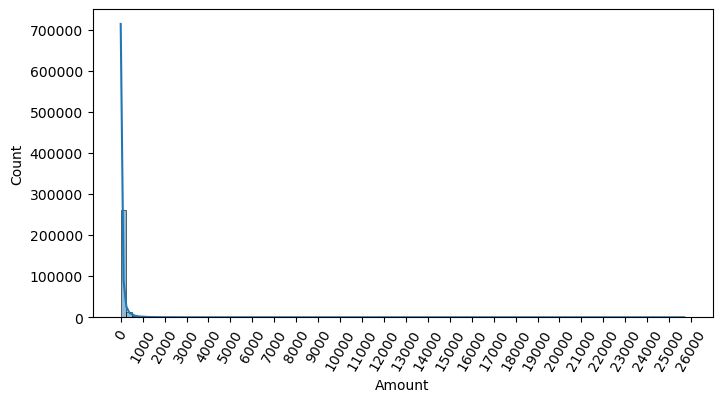

In [37]:
import seaborn as sns

plt.figure(figsize = (8, 4))
plt.xticks(range(0, 30000, 1000), rotation = 60)
sns.histplot(card_df['Amount'], bins = 100, kde = True)
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df = None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(labels = ['Time', 'Amount'], axis = 1, inplace = True)
    return df_copy


In [44]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

lr_clf = LogisticRegression(max_iter = 1000)
get_model_train_eval(lr_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

lgbm_clf = LGBMClassifier(n_estimator = 1000, num_leaves = 64, n_jobs = -1)
get_model_train_eval(lgbm_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9702
[LightGBM] [Warning] Unknown parameter: n_estimator
오차 행렬
[[85005   290]
 [   70    78]]
정확도: 0.9958, 정밀도: 0.2120, 재현율: 0.5270,    F1: 0.3023, AUC:0.6991


In [40]:
def get_preprocessed_df(df = None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(labels = ['Time', 'Amount'], axis = 1, inplace = True)
    return df_copy


In [46]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

lr_clf = LogisticRegression(max_iter = 1000)
get_model_train_eval(lr_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

lgbm_clf = LGBMClassifier(n_estimator = 1000, num_leaves = 64, n_jobs = -1)
get_model_train_eval(lgbm_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727
[LightGBM] [Warning] Unknown parameter: n_estimator
오차 행렬
[[85041   254]
 [   89    59]]
정확도: 0.9960, 정밀도: 0.1885, 재현율: 0.3986,    F1: 0.2560, AUC:0.5698


<AxesSubplot:>

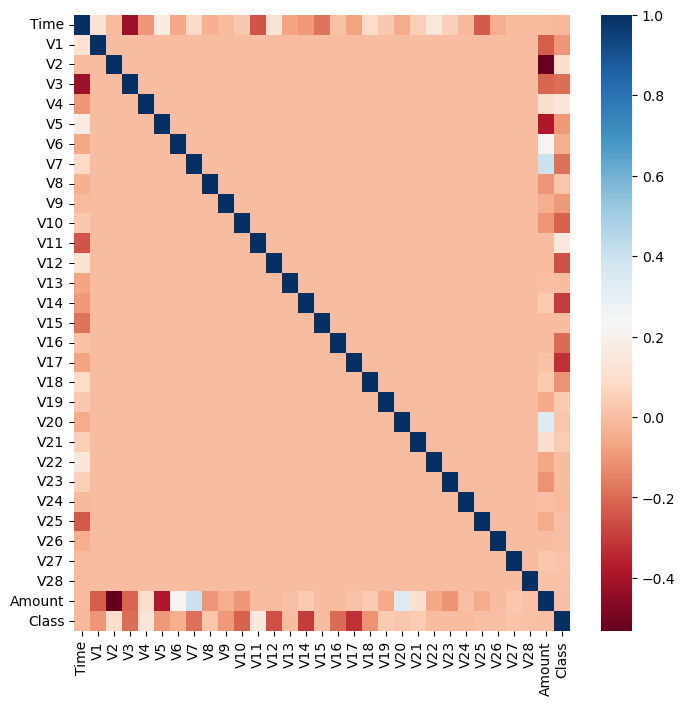

In [4]:
import seaborn as sns

plt.figure(figsize = (8, 8))
corr = card_df.corr()
sns.heatmap(corr, cmap = 'RdBu')

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('./creditcard.csv')

In [34]:
import numpy as np

def get_outlier(df = None, column = None, weight = 1.5):
    fraud = df[df['Class'] == 1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [35]:
outlier_index = get_outlier(df = card_df, column = 'V14', weight = 1.5)
print('outlier_index:', outlier_index)

outlier_index: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [38]:
def get_preprocessed_df(df = None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis = 1, inplace = True)
    outlier_index = get_outlier(df = df_copy, column = 'V14', weight = 1.5)
    df_copy.drop(outlier_index, axis = 0, inplace = True)
    return df_copy



(284807, 31)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
def get_model_train_eval(model, ftr_train = None, ftr_test = None, tgt_train = None, tgt_test = None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)
    
def get_train_test_dataset(df = None):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                       test_size = 0.3, random_state = 0, stratify = y_target)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
lr_clf = LogisticRegression(max_iter = 1000)
get_model_train_eval(lr_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

lgbm_clf = LGBMClassifier(n_estimator = 1000, num_leaves = 64, n_jobs = -1)
get_model_train_eval(lgbm_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727
[LightGBM] [Warning] Unknown parameter: n_estimator
오차 행렬
[[85041   254]
 [   89    59]]
정확도: 0.9960, 정밀도: 0.1885, 재현율: 0.3986,    F1: 0.2560, AUC:0.5698


In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

lr_clf = LogisticRegression(max_iter = 1000)
get_model_train_eval(lr_clf, ftr_train = X_train_over, ftr_test = X_test, tgt_train = y_train_over, 
                     tgt_test = y_test)

오차 행렬
[[83317  1978]
 [   15   133]]
정확도: 0.9767, 정밀도: 0.0630, 재현율: 0.8986,    F1: 0.1178, AUC:0.9803


In [65]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data =cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size = 0.2, random_state = 0)

knn_clf = KNeighborsClassifier(n_neighbors = 4)
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators = 100)

lr_final = LogisticRegression()

knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN accuracy:', round(accuracy_score(y_test, knn_pred), 4))
print('RandomForest accuracy:', round(accuracy_score(y_test, rf_pred), 4))
print('DecisionTree accuracy:', round(accuracy_score(y_test, dt_pred), 4))
print('AdaBoost accuracy:', round(accuracy_score(y_test, ada_pred), 4))


KNN accuracy: 0.9211
RandomForest accuracy: 0.9649
DecisionTree accuracy: 0.9123
AdaBoost accuracy: 0.9561


In [71]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
pred = np.transpose(pred)

lr_final.fit(pred, y_test)
final = lr_final.predict(pred)
print(type(final))
print('accuracy:', round(accuracy_score(y_test, final), 4))

<class 'numpy.ndarray'>
accuracy: 0.9737


4.028260257450866 6.49047862852975
cost: 0.07754792006806614
4.031399651812396 6.485778349157565


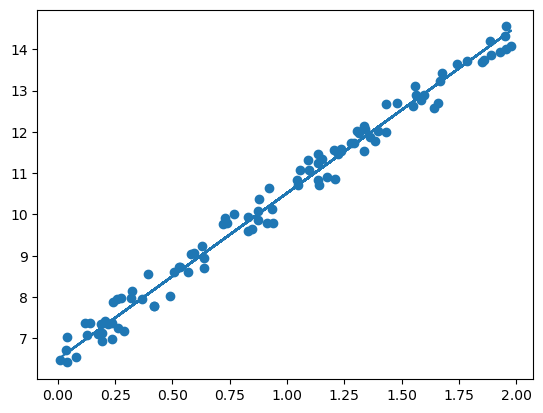

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.rand(100, 1)

def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    w0_factors = np.ones((N, 1))
    
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    w1_update = -(2/N) * learning_rate * np.dot(X.T, diff)
    w0_update = -(2/N) * learning_rate * np.dot(w0_factors.T, diff)
    
    return w1_update, w0_update


def gradient_descent_steps(X, y, iters = 10000):
    w1 = np.zeros((1, 1))
    w0 = np.zeros((1, 1))
    
    for i in range(iters):
        w1_upgrade, w0_upgrade = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
        w1 = w1 - w1_upgrade
        w0 = w0 - w0_upgrade
        
    return w1, w0

def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

def stochastic_gradient_descent_stops(X, y, batch_size = 10, iters = 1000):
    w1 = np.zeros((1, 1))
    w0 = np.zeros((1, 1))
    prev_cost = 100000
    iter_index = 0
    
    for i in range(iters):
        np.random.seed(i)
        stochastic_random_index = np.random.permutation(X.shape[0])
        X_samples = X[stochastic_random_index[0:batch_size]]
        y_samples = y[stochastic_random_index[0:batch_size]]
        w1_updates, w0_updates = get_weight_updates(w1, w0, X_samples, y_samples, learning_rate = 0.01)
        w1 = w1 - w1_updates
        w0 = w0 - w0_updates
        
    return w1, w0
w1, w0 = gradient_descent_steps(X, y, iters = 1000)
x1, x0 = stochastic_gradient_descent_stops(X, y, batch_size = 10, iters = 1000)
x_pred = x1[0, 0] * X + x0[0, 0]
y_pred = w1[0, 0] * X + w0[0, 0]
print(w1[0, 0], w0[0, 0])
print('cost:', get_cost(y, y_pred))

print(x1[0, 0], x0[0, 0])
plt.scatter(X, y)
plt.plot(X, y_pred)